tensor([[8.9854, 5.1294],
        [5.1294, 9.6581]], dtype=torch.float64) tensor([[1.1861, 0.3512],
        [0.3512, 1.0000]], dtype=torch.float64)


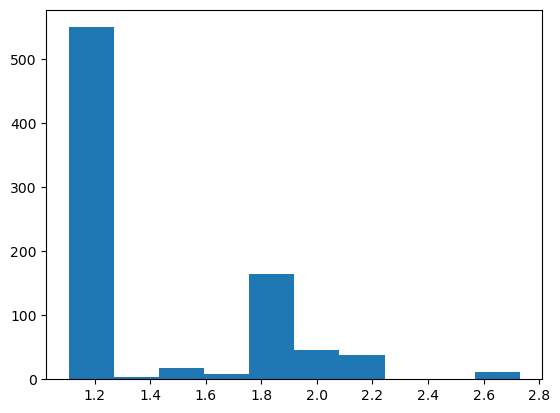

{'1_1': [tensor(1.8200, dtype=torch.float64), tensor(1.1220, dtype=torch.float64), tensor(1.1162, dtype=torch.float64), tensor(1.1134, dtype=torch.float64), tensor(2.2177, dtype=torch.float64), tensor(1.1220, dtype=torch.float64), tensor(1.1152, dtype=torch.float64), tensor(1.1220, dtype=torch.float64), tensor(1.1152, dtype=torch.float64), tensor(1.1169, dtype=torch.float64), tensor(1.1151, dtype=torch.float64), tensor(1.8379, dtype=torch.float64), tensor(1.1134, dtype=torch.float64), tensor(1.8230, dtype=torch.float64), tensor(1.1306, dtype=torch.float64), tensor(1.8230, dtype=torch.float64), tensor(1.1151, dtype=torch.float64), tensor(1.1228, dtype=torch.float64), tensor(1.1124, dtype=torch.float64), tensor(1.1220, dtype=torch.float64), tensor(1.1306, dtype=torch.float64), tensor(1.1162, dtype=torch.float64), tensor(1.8200, dtype=torch.float64), tensor(1.8379, dtype=torch.float64), tensor(1.8568, dtype=torch.float64), tensor(2.2177, dtype=torch.float64), tensor(1.1169, dtype=torch.fl

In [1]:
import sys
import os
sys.path.append("..")
from geomatry.opt_Energy_approximated.optimizer import MultipleSystemOptimizer
from geomatry.opt.loss import rmsd_loss
from geomatry.ff.graph import get_given_graph_builder
from geomatry.ff.LennardJones import LennardJonesFF, _random_lj_ff_param, _random_lj_systems
#from geomatry.ff.springs import SpringFF, _random_spring_systems, _random_spring_ff_param
from geomatry.ff.NN import NNPotentialFF, _random_nn_systems, _random_nn_ff_param
import torch
import copy

def onlyRsquare(k_perturbed, r0_perturbed, optimizer):
    ff.reset_parameters(k_perturbed, r0_perturbed)
    params_0 = ff.state_dict()
    print("params_optimized",optimizer.optimize(params_0))
    print("params_answer",k, r0)
    return copy.deepcopy(params_0)

import copy

systemN = 15
N = 8
N_pairs = 28
max_Za = 1
Ras, Zas, idx_is, idx_js = _random_lj_systems(systemN, N, N_pairs, max_Za, start_Za=1)
params = _random_nn_ff_param(max_Za)
ff = NNPotentialFF(max_Za)
ff.reset_parameters(params)

fixed_atom_indices = [0]
graph_builders = [get_given_graph_builder(idx_i, idx_j) for idx_i, idx_j in zip(idx_is, idx_js)]


k, r0 = _random_lj_ff_param(max_Za,k_max=10,r0_max=2)
r0[1,1]=1
print(k, r0)
ff_spring = LennardJonesFF(max_Za)
ff_spring.reset_parameters(k, r0)
import copy
params_spring = copy.deepcopy(ff_spring.state_dict())
optimizer_spring = MultipleSystemOptimizer(
    Ras, Zas, graph_builders, ff_spring, rmsd_loss, 
    params_star=params_spring,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=True
)
e_size=0.02

optimizer = MultipleSystemOptimizer(
    optimizer_spring.Ra_stars, Zas, graph_builders, ff, rmsd_loss, 
    params_star=params,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=False
)
optimizer_Energy = optimizer

optimizer.ff.changeParamByInputDistribution(e_size,optimizer_spring.Ra_stars,Zas,graph_builders,fixed_atom_indices)
params=copy.deepcopy(optimizer.ff.state_dict())
#print('start', params_0)
#print('goal',params_star)


In [2]:
print(optimizer_Energy.Ra_stars)

[tensor([[ 2.7708,  2.0855,  0.2940],
        [ 0.9704,  1.8995, -0.0252],
        [ 1.1407,  1.8783,  1.0836],
        [ 3.3422,  2.0863,  1.2528],
        [ 2.8378,  1.1466,  0.9045],
        [ 1.8856,  1.4171,  0.3908],
        [ 1.7644,  2.5406,  0.4269],
        [ 2.2306,  2.0039,  1.2838]], dtype=torch.float64), tensor([[ 1.5644,  2.3143,  0.0535],
        [ 0.5924,  1.8226, -0.2493],
        [ 0.9738,  1.7416,  0.8037],
        [ 0.5835,  2.7145,  0.4231],
        [ 1.3980,  0.7215,  0.9553],
        [ 1.4980,  1.2081, -0.0442],
        [ 0.4908,  0.8635,  0.3105],
        [ 0.8695,  2.8231, -0.6564]], dtype=torch.float64), tensor([[ 1.5522,  1.7234,  0.3865],
        [ 1.5369,  2.3960, -0.5062],
        [ 1.6298,  2.3163,  2.2214],
        [ 2.1502,  2.0068,  1.2817],
        [ 1.0165,  2.7055,  0.4335],
        [ 2.1352,  2.6792,  0.3946],
        [ 1.6146,  2.9889,  1.3286],
        [ 1.0315,  2.0331,  1.3206]], dtype=torch.float64), tensor([[1.4447, 2.8337, 0.1311],
        

In [3]:
print(ff.state_dict().keys())
print(ff.nets['0_0'].state_dict().keys())


odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])
odict_keys(['net.0.weight', 'net.0.bias', 'net.2.weight', 'net.2.bias', 'net.4.weight', 'net.4.bias'])


nan
Ra_star_energy tensor(-191.4387, dtype=torch.float64, grad_fn=<DivBackward0>)


/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_1992/4214981563.py:18: RuntimeWarning: invalid value encountered in divide
  return direction/np.linalg.norm(direction)
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_1992/4214981563.py:32: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]+=x[i]*n1
/var/folders/d9/j9pnzj2s30jf7r3wxfwp0yz80000gn/T/ipykernel_1992/4214981563.py:35: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  Ra_temp[:,:]-=x[i]*n1


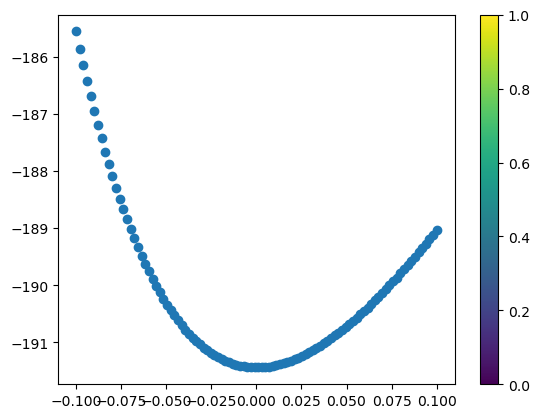

In [4]:
#Draw energy landscape near real optimal geometry
#In direction towards current local minimum
from torch import FloatTensor, IntTensor
from ase import Atoms
import numpy as np
import matplotlib.pyplot as plt

def get_ase_atoms(Ra: FloatTensor, Za: IntTensor) -> Atoms:
    return Atoms(
        positions=Ra.detach().cpu().numpy(),
        numbers=Za.detach().cpu().numpy()
    )

def getMaxDirection(optimizer, params_0, index):
    Ra_star_0=optimizer.fitting._get_Ra_star(params_0,optimizer.graph_builders[index],optimizer.Ra_stars[index],optimizer.Zas[index],optimizer.fixed_atom_indices)
    direction=(Ra_star_0-optimizer.Ra_stars[index]).detach().numpy()
    direction[fixed_atom_indices,:]=0
    return direction/np.linalg.norm(direction)

def drawGraphs(optimizer,params, index):
    n1=getMaxDirection(optimizer,params, index)
    if (np.isnan(n1[0,0])):
        print('nan')
        n1=np.zeros(n1.shape)
        n1[-1,0]=1
    optimizer.ff.reset_parameters(params['k'],params['r0'])
    Ra_temp=copy.deepcopy(optimizer.Ra_stars[index])
    atoms=get_ase_atoms(Ra_temp, optimizer.Zas[index])
    x=np.linspace(-0.1,0.1,100)
    z1=copy.deepcopy(x)
    for i in range(100):
        Ra_temp[:,:]+=x[i]*n1
        E0=optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms))
        z1[i]=E0
        Ra_temp[:,:]-=x[i]*n1
    #z1[z1>30]=30
    print('Ra_star_energy',optimizer.ff.get_E(Ra_temp,optimizer.Zas[index],*optimizer.graph_builders[index](atoms)))
    plt.scatter(x,z1)
    plt.colorbar()
drawGraphs(optimizer_spring,params_spring,8)

params_0 odict_keys(['nets.0_0.net.0.weight', 'nets.0_0.net.0.bias', 'nets.0_0.net.2.weight', 'nets.0_0.net.2.bias', 'nets.0_0.net.4.weight', 'nets.0_0.net.4.bias', 'nets.0_1.net.0.weight', 'nets.0_1.net.0.bias', 'nets.0_1.net.2.weight', 'nets.0_1.net.2.bias', 'nets.0_1.net.4.weight', 'nets.0_1.net.4.bias', 'nets.1_1.net.0.weight', 'nets.1_1.net.0.bias', 'nets.1_1.net.2.weight', 'nets.1_1.net.2.bias', 'nets.1_1.net.4.weight', 'nets.1_1.net.4.bias'])


  0%|          | 0/40001 [00:00<?, ?it/s]

0 curvature tensor(0.6785, dtype=torch.float64, grad_fn=<DivBackward0>) 351.3465621274881 distance 5.52153985667594 loss 3443.203980867441
trueloss 3443.203980867441
loss 3443.203980867441
tensor([-0.2617, -0.2572, -0.3353, -0.2629, -0.3519, -0.4361, -0.3892, -0.2823,
        -0.2605, -0.2741], dtype=torch.float64, grad_fn=<SubBackward0>)


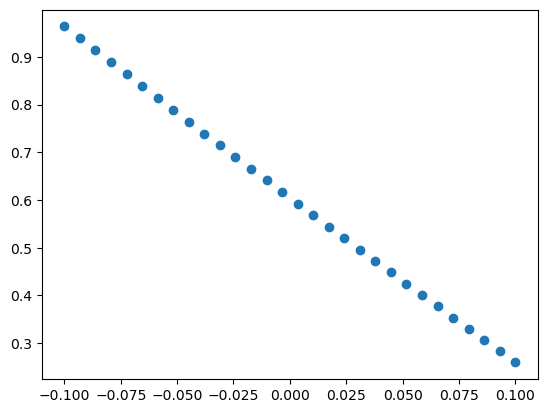

  1%|          | 500/40001 [04:29<5:57:22,  1.84it/s]

500 curvature tensor(-0.0139, dtype=torch.float64, grad_fn=<DivBackward0>) 0.3658314213960009 distance -0.9723015465652144 loss 5.119649514419622
trueloss 5.119649514419622
loss 5.119649514419622
tensor([-0.0013, -0.0012, -0.0017, -0.0009, -0.0012, -0.0009, -0.0015, -0.0011,
        -0.0012, -0.0017], dtype=torch.float64, grad_fn=<SubBackward0>)


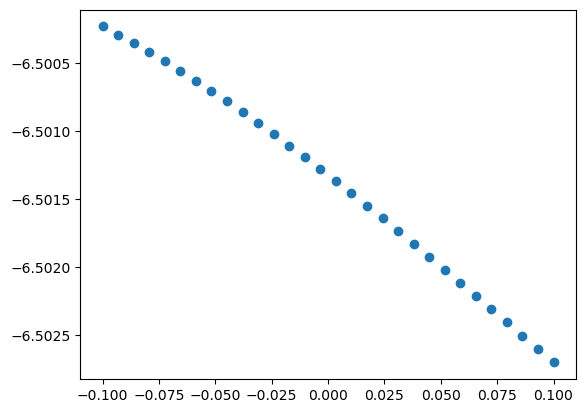

  2%|▏         | 1000/40001 [08:59<5:53:15,  1.84it/s]

1000 curvature tensor(0.0381, dtype=torch.float64, grad_fn=<DivBackward0>) 0.10799223758613573 distance 0.17539809946214419 loss 3.990936820233705
trueloss 3.990936820233705
loss 3.990936820233705
tensor([-0.0003, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0002, -0.0003,
        -0.0003, -0.0003], dtype=torch.float64, grad_fn=<SubBackward0>)


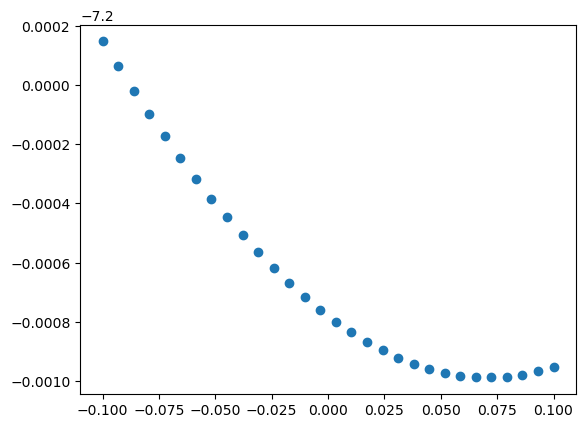

  4%|▎         | 1500/40001 [13:27<5:39:37,  1.89it/s]

1500 curvature tensor(0.0457, dtype=torch.float64, grad_fn=<DivBackward0>) 0.29947867788654836 distance 0.24026836364667994 loss 3.5760339547565696
trueloss 3.5760339547565696
loss 3.5760339547565696
tensor([-0.0006, -0.0006, -0.0005, -0.0007, -0.0006, -0.0007, -0.0007, -0.0006,
        -0.0007, -0.0006], dtype=torch.float64, grad_fn=<SubBackward0>)


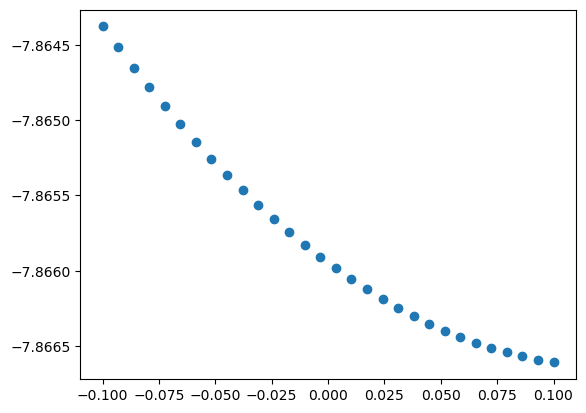

  5%|▍         | 2000/40001 [17:56<5:40:22,  1.86it/s]

2000 curvature tensor(0.1286, dtype=torch.float64, grad_fn=<DivBackward0>) 0.872920131922195 distance 0.11948282617702499 loss 5.948806990246489
trueloss 5.948806990246489
loss 5.948806990246489
tensor([-3.0720e-04, -3.4260e-04,  1.0489e-04, -1.8887e-04, -1.8007e-04,
        -2.8382e-04, -2.2895e-07,  8.9823e-05, -4.0438e-04, -3.4544e-04],
       dtype=torch.float64, grad_fn=<SubBackward0>)


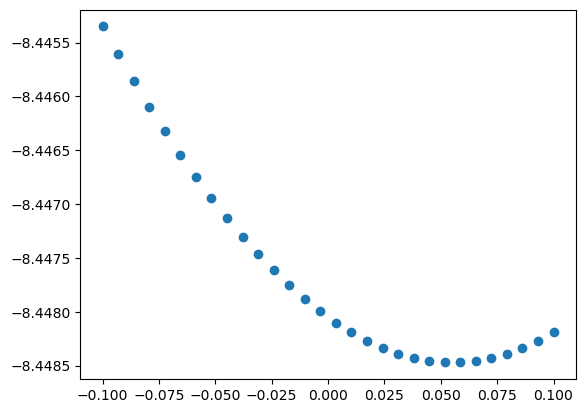

  6%|▌         | 2500/40001 [22:26<5:40:49,  1.83it/s]

2500 curvature tensor(0.0732, dtype=torch.float64, grad_fn=<DivBackward0>) 0.5269730072316139 distance 0.19160478645639087 loss 4.111347838993913
trueloss 4.111347838993913
loss 4.111347838993913
tensor([-0.0007, -0.0007, -0.0007, -0.0007, -0.0006, -0.0007, -0.0007, -0.0007,
        -0.0006, -0.0007], dtype=torch.float64, grad_fn=<SubBackward0>)


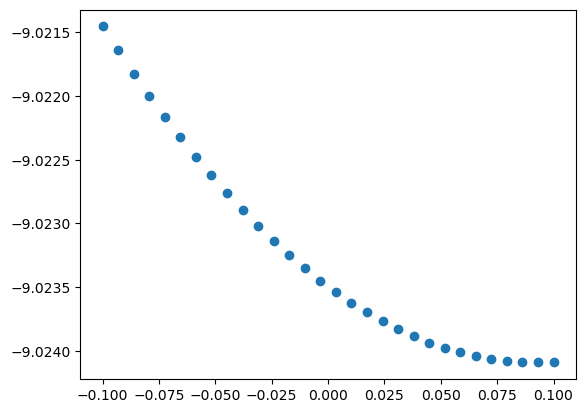

  7%|▋         | 3000/40001 [26:56<5:35:54,  1.84it/s]

3000 curvature tensor(0.2280, dtype=torch.float64, grad_fn=<DivBackward0>) 0.45327988618824866 distance 0.10356158035282008 loss 5.702541970912318
trueloss 5.702541970912318
loss 5.702541970912318
tensor([ 2.4459e-04,  6.6946e-04,  1.8819e-05, -1.9582e-04,  1.2569e-04,
        -4.7602e-04,  6.5629e-04, -1.1193e-04,  6.1301e-04, -5.0350e-04],
       dtype=torch.float64, grad_fn=<SubBackward0>)


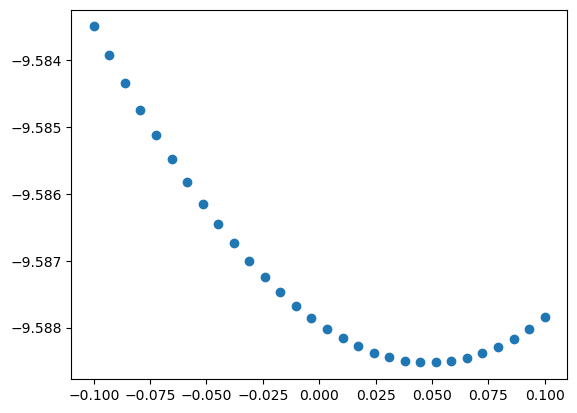

  9%|▊         | 3500/40001 [31:26<5:32:33,  1.83it/s]

3500 curvature tensor(0.2298, dtype=torch.float64, grad_fn=<DivBackward0>) 0.20747804021288604 distance 0.07108569144413127 loss 4.919078582843504
trueloss 4.919078582843504
loss 4.919078582843504
tensor([ 5.1605e-04,  3.2808e-04, -7.0051e-05, -1.5714e-04,  1.1132e-03,
         5.8709e-04,  2.4922e-05,  5.4179e-04,  1.2584e-04,  9.6328e-04],
       dtype=torch.float64, grad_fn=<SubBackward0>)


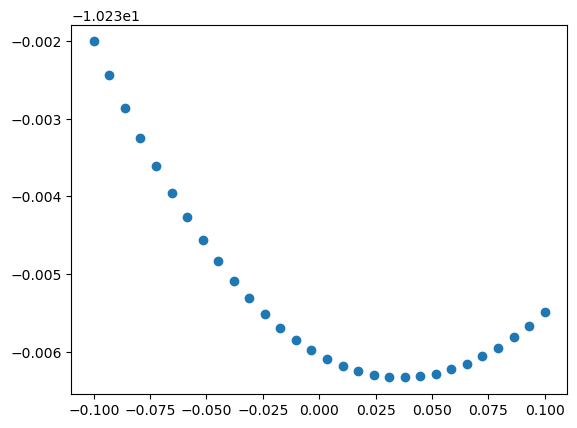

 10%|▉         | 4000/40001 [35:56<5:20:49,  1.87it/s]

4000 curvature tensor(0.2765, dtype=torch.float64, grad_fn=<DivBackward0>) 0.913234551320629 distance 0.1274548254986816 loss 6.97362339688158
trueloss 6.97362339688158
loss 6.97362339688158
tensor([-0.0008,  0.0003, -0.0006, -0.0002, -0.0010, -0.0006, -0.0008, -0.0010,
        -0.0004, -0.0010], dtype=torch.float64, grad_fn=<SubBackward0>)


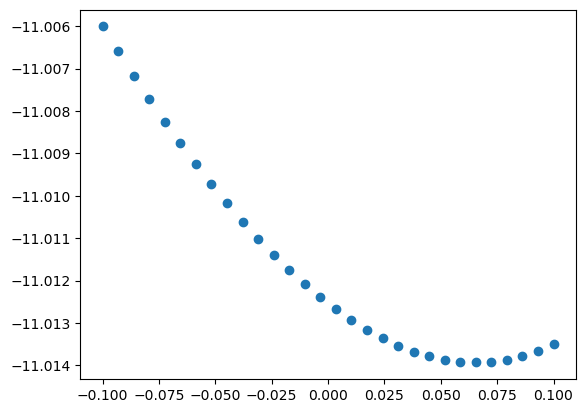

 11%|█         | 4500/40001 [40:26<5:18:54,  1.86it/s]

4500 curvature tensor(0.3850, dtype=torch.float64, grad_fn=<DivBackward0>) 0.09466347883758816 distance 0.05094184749483853 loss 6.977199601452691
trueloss 6.977199601452691
loss 6.977199601452691
tensor([0.0003, 0.0002, 0.0002, 0.0016, 0.0002, 0.0010, 0.0025, 0.0005, 0.0014,
        0.0004], dtype=torch.float64, grad_fn=<SubBackward0>)


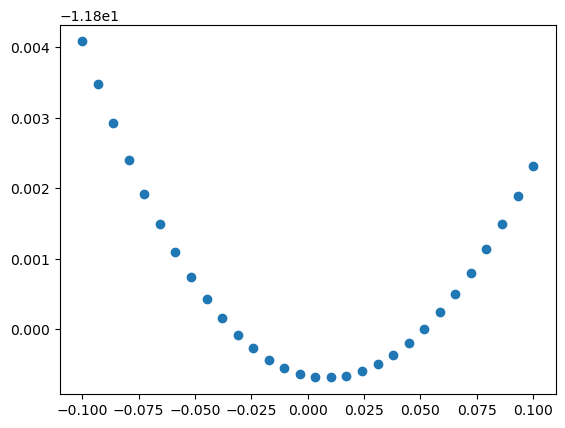

 12%|█▏        | 5000/40001 [44:56<5:13:05,  1.86it/s]

5000 curvature tensor(0.4292, dtype=torch.float64, grad_fn=<DivBackward0>) 0.8628241630418858 distance 0.11427603016435339 loss 5.84611598897139
trueloss 5.84611598897139
loss 5.84611598897139
tensor([-0.0005, -0.0012, -0.0013, -0.0001, -0.0013,  0.0005, -0.0012, -0.0005,
        -0.0011, -0.0013], dtype=torch.float64, grad_fn=<SubBackward0>)


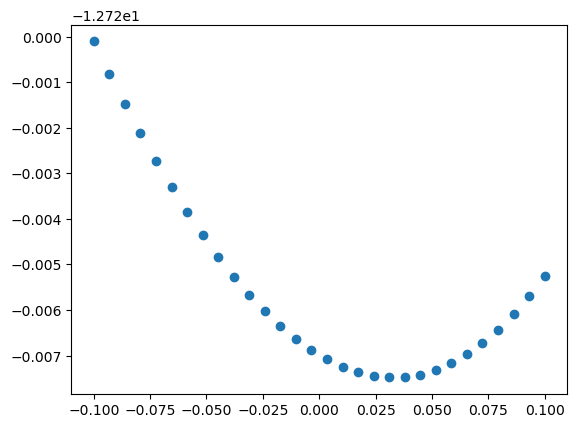

 14%|█▎        | 5500/40001 [49:27<5:14:11,  1.83it/s]

5500 curvature tensor(0.3487, dtype=torch.float64, grad_fn=<DivBackward0>) 0.8678792026997721 distance 0.07004840506591109 loss 4.996970506168951
trueloss 4.996970506168951
loss 4.996970506168951
tensor([ 4.1865e-04,  2.4420e-04,  2.2773e-03,  2.4399e-03,  8.4764e-04,
         1.2893e-03,  9.8385e-04, -2.2235e-05,  1.6454e-03, -1.5378e-05],
       dtype=torch.float64, grad_fn=<SubBackward0>)


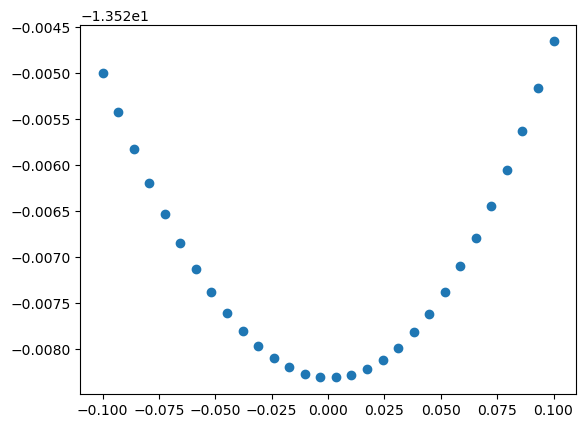

 15%|█▍        | 6000/40001 [53:56<5:02:53,  1.87it/s]

6000 curvature tensor(0.5414, dtype=torch.float64, grad_fn=<DivBackward0>) 0.2482294950852882 distance 0.08061693405879003 loss 5.059473715124202
trueloss 5.059473715124202
loss 5.059473715124202
tensor([ 0.0022, -0.0005,  0.0005,  0.0015,  0.0002, -0.0003,  0.0010, -0.0004,
        -0.0006,  0.0018], dtype=torch.float64, grad_fn=<SubBackward0>)


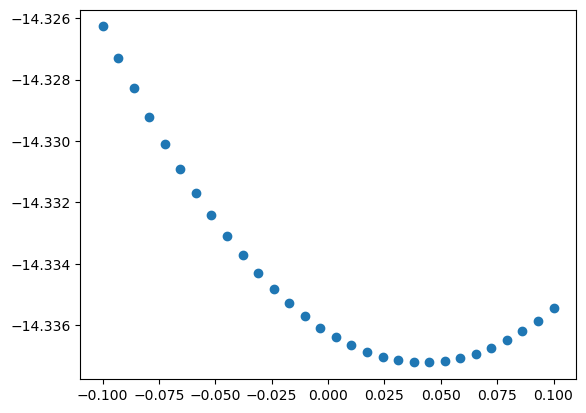

 16%|█▌        | 6500/40001 [58:26<5:05:44,  1.83it/s]

6500 curvature tensor(0.7867, dtype=torch.float64, grad_fn=<DivBackward0>) 0.21547057817599438 distance 0.03466899604809807 loss 3.730860682127446
trueloss 3.730860682127446
loss 3.730860682127446
tensor([0.0063, 0.0026, 0.0060, 0.0073, 0.0046, 0.0075, 0.0064, 0.0061, 0.0042,
        0.0042], dtype=torch.float64, grad_fn=<SubBackward0>)


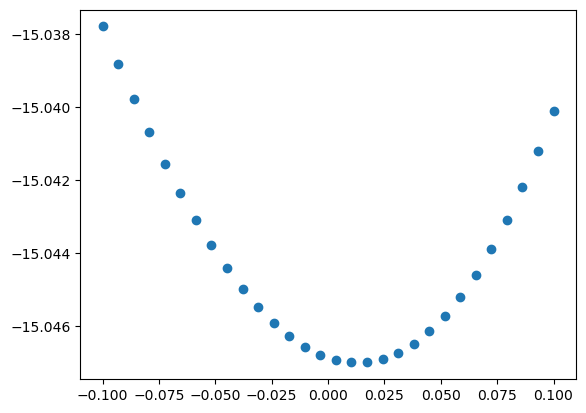

 17%|█▋        | 7000/40001 [1:02:56<5:00:15,  1.83it/s]

7000 curvature tensor(0.8231, dtype=torch.float64, grad_fn=<DivBackward0>) 0.3730228212655233 distance 0.02156855835818628 loss 4.519954140316929
trueloss 4.519954140316929
loss 4.519954140316929
tensor([0.0049, 0.0065, 0.0035, 0.0031, 0.0060, 0.0043, 0.0054, 0.0045, 0.0056,
        0.0024], dtype=torch.float64, grad_fn=<SubBackward0>)


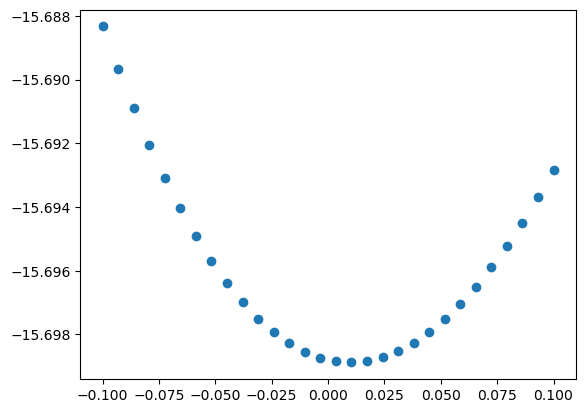

 19%|█▊        | 7500/40001 [1:07:27<4:55:30,  1.83it/s]

7500 curvature tensor(0.9508, dtype=torch.float64, grad_fn=<DivBackward0>) 0.2569694697885484 distance 0.10024847255745983 loss 3.98946258004029
trueloss 3.98946258004029
loss 3.98946258004029
tensor([-1.2556e-03, -2.0664e-03,  4.0613e-04, -2.1811e-03, -2.2957e-03,
        -2.3487e-03, -4.1793e-04, -8.3928e-05,  1.8354e-04, -2.0426e-03],
       dtype=torch.float64, grad_fn=<SubBackward0>)


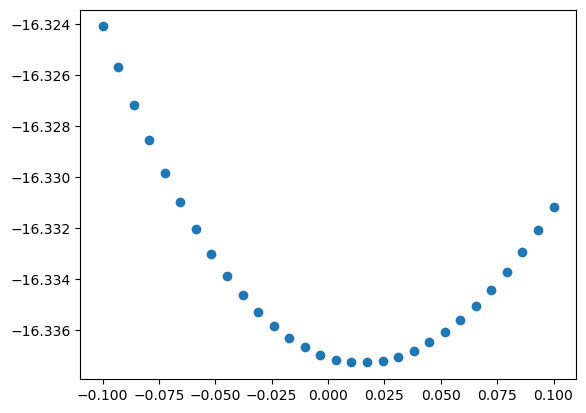

 20%|█▉        | 8000/40001 [1:11:58<4:46:06,  1.86it/s]

8000 curvature tensor(0.6099, dtype=torch.float64, grad_fn=<DivBackward0>) 0.588653513437089 distance 0.02546025867057922 loss 4.593290452955056
trueloss 4.593290452955056
loss 4.593290452955056
tensor([0.0043, 0.0020, 0.0035, 0.0069, 0.0042, 0.0045, 0.0049, 0.0039, 0.0060,
        0.0060], dtype=torch.float64, grad_fn=<SubBackward0>)


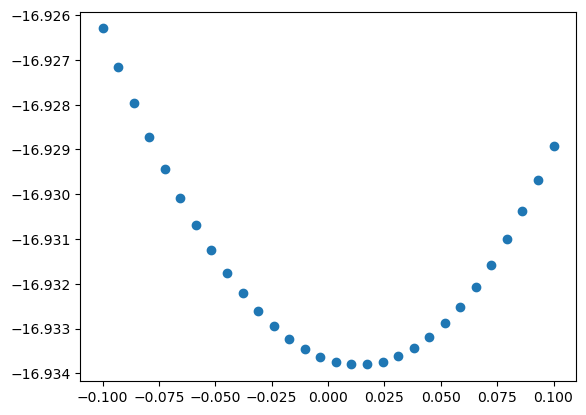

 21%|██        | 8500/40001 [1:16:29<4:44:07,  1.85it/s]

8500 curvature tensor(0.8396, dtype=torch.float64, grad_fn=<DivBackward0>) 0.4236606214846475 distance 0.04978200592152165 loss 4.326913494263956
trueloss 4.326913494263956
loss 4.326913494263956
tensor([0.0004, 0.0015, 0.0054, 0.0039, 0.0007, 0.0049, 0.0012, 0.0023, 0.0023,
        0.0042], dtype=torch.float64, grad_fn=<SubBackward0>)


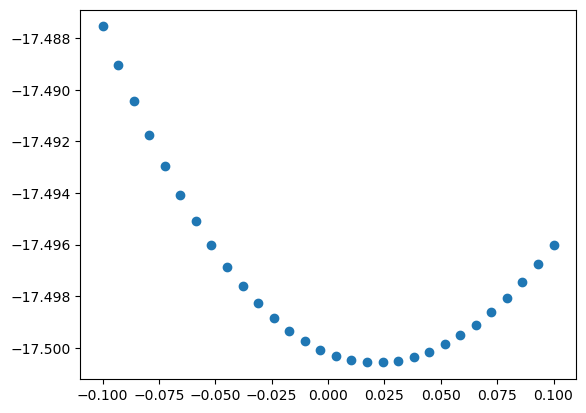

 22%|██▏       | 9000/40001 [1:20:59<4:40:33,  1.84it/s]

9000 curvature tensor(1.8288, dtype=torch.float64, grad_fn=<DivBackward0>) 0.3160422512152783 distance 0.016177285304436174 loss 2.3217958429624606
trueloss 2.3217958429624606
loss 2.3217958429624606
tensor([0.0071, 0.0118, 0.0130, 0.0051, 0.0058, 0.0131, 0.0050, 0.0182, 0.0133,
        0.0102], dtype=torch.float64, grad_fn=<SubBackward0>)


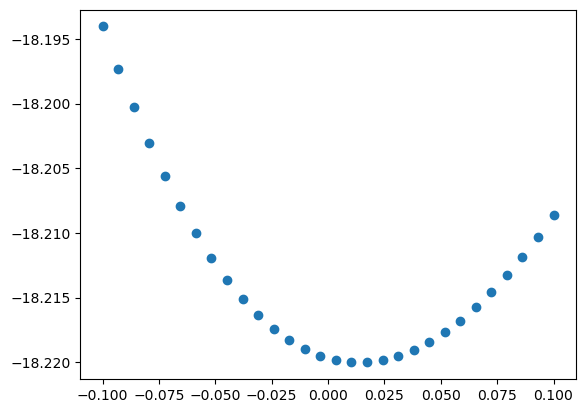

 24%|██▎       | 9500/40001 [1:25:30<4:33:26,  1.86it/s]

9500 curvature tensor(0.8417, dtype=torch.float64, grad_fn=<DivBackward0>) 0.8675118554944228 distance 0.04973277892404776 loss 3.2614323170970994
trueloss 3.2614323170970994
loss 3.2614323170970994
tensor([0.0006, 0.0016, 0.0037, 0.0016, 0.0043, 0.0012, 0.0040, 0.0045, 0.0020,
        0.0043], dtype=torch.float64, grad_fn=<SubBackward0>)


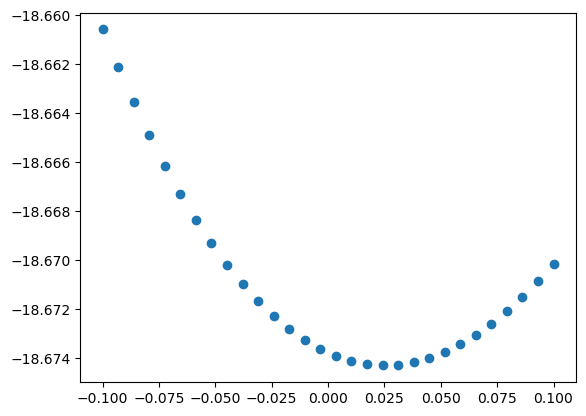

 25%|██▍       | 10000/40001 [1:30:00<4:27:13,  1.87it/s]

10000 curvature tensor(2.0381, dtype=torch.float64, grad_fn=<DivBackward0>) 0.26103272659276133 distance 0.020325355620376514 loss 3.0066811496667385
trueloss 3.0066811496667385
loss 3.0066811496667385
tensor([0.0087, 0.0137, 0.0106, 0.0204, 0.0088, 0.0076, 0.0096, 0.0144, 0.0161,
        0.0078], dtype=torch.float64, grad_fn=<SubBackward0>)


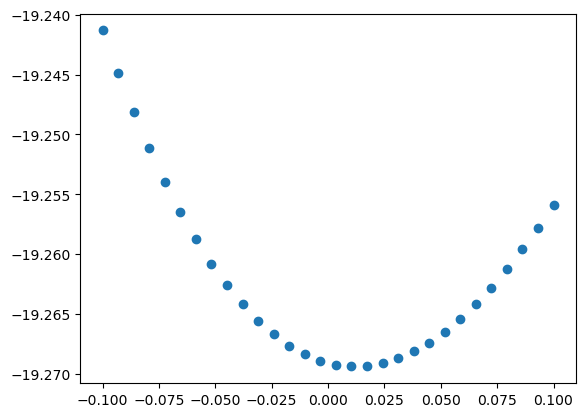

 26%|██▌       | 10500/40001 [1:34:30<4:25:02,  1.86it/s]

10500 curvature tensor(1.5326, dtype=torch.float64, grad_fn=<DivBackward0>) 0.7370938044691666 distance 0.08300399121840221 loss 3.543985804896245
trueloss 3.543985804896245
loss 3.543985804896245
tensor([ 1.3098e-03,  8.0698e-03, -3.4744e-05, -1.4705e-03,  1.2456e-03,
        -3.9769e-04,  3.0111e-03,  1.1285e-02,  6.3478e-03,  7.0402e-03],
       dtype=torch.float64, grad_fn=<SubBackward0>)


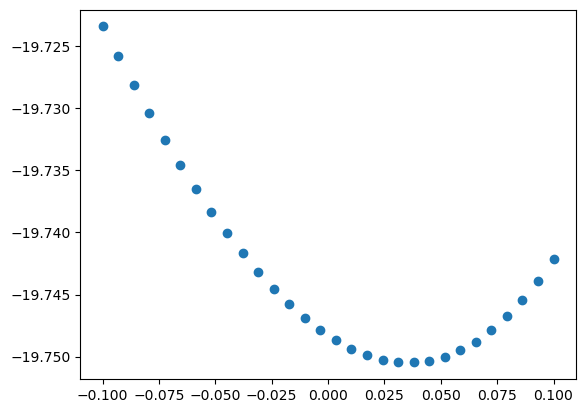

 27%|██▋       | 11000/40001 [1:38:58<4:18:05,  1.87it/s]

11000 curvature tensor(2.4315, dtype=torch.float64, grad_fn=<DivBackward0>) 0.09319853360809315 distance 0.019371999948137687 loss 2.0933051066486206
trueloss 2.0933051066486206
loss 2.0933051066486206
tensor([0.0107, 0.0147, 0.0302, 0.0161, 0.0122, 0.0244, 0.0152, 0.0179, 0.0262,
        0.0337], dtype=torch.float64, grad_fn=<SubBackward0>)


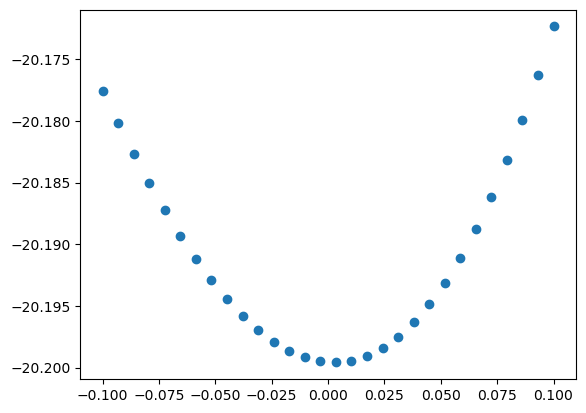

 29%|██▊       | 11500/40001 [1:43:27<4:18:21,  1.84it/s]

11500 curvature tensor(2.5467, dtype=torch.float64, grad_fn=<DivBackward0>) 0.28087941949047385 distance 0.016309914964383675 loss 2.7322417149076306
trueloss 2.7322417149076306
loss 2.7322417149076306
tensor([0.0096, 0.0250, 0.0179, 0.0161, 0.0197, 0.0214, 0.0186, 0.0194, 0.0086,
        0.0069], dtype=torch.float64, grad_fn=<SubBackward0>)


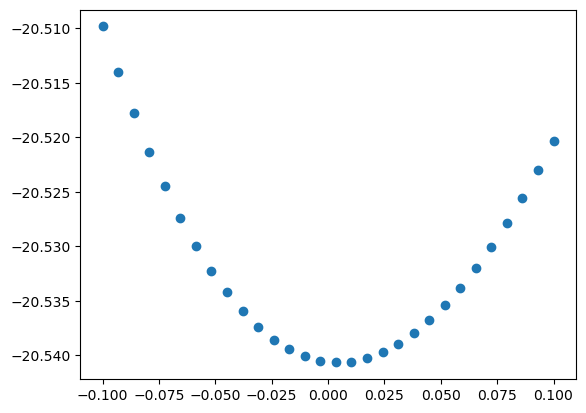

 30%|██▉       | 12000/40001 [1:47:56<4:10:38,  1.86it/s]

12000 curvature tensor(1.2824, dtype=torch.float64, grad_fn=<DivBackward0>) 0.06261779018560201 distance 0.02975627932963009 loss 1.9921794007137998
trueloss 1.9921794007137998
loss 1.9921794007137998
tensor([0.0028, 0.0046, 0.0066, 0.0135, 0.0069, 0.0077, 0.0033, 0.0071, 0.0100,
        0.0061], dtype=torch.float64, grad_fn=<SubBackward0>)


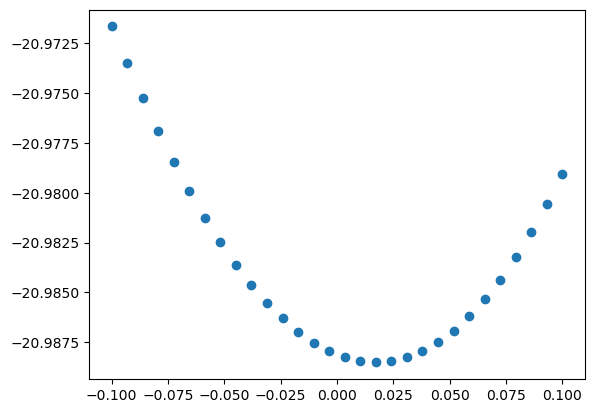

 31%|███       | 12500/40001 [1:52:29<4:09:40,  1.84it/s]

12500 curvature tensor(2.2734, dtype=torch.float64, grad_fn=<DivBackward0>) 0.6647489327647775 distance 0.06661761210247977 loss 3.161282933845758
trueloss 3.161282933845758
loss 3.161282933845758
tensor([3.2176e-04, 1.5467e-02, 2.1695e-05, 2.3959e-03, 2.0639e-02, 1.5660e-03,
        1.2965e-03, 5.8164e-03, 2.2609e-03, 9.1566e-03], dtype=torch.float64,
       grad_fn=<SubBackward0>)


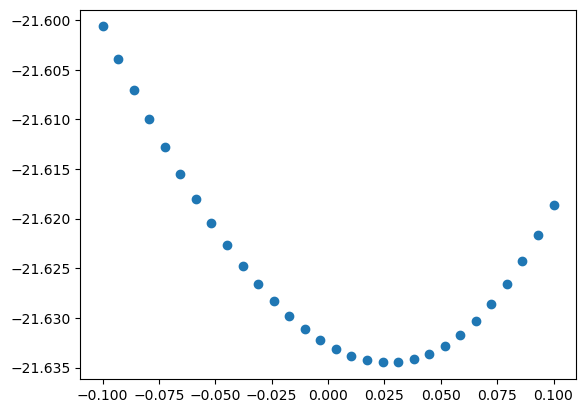

 32%|███▏      | 13000/40001 [1:57:01<4:08:37,  1.81it/s]

13000 curvature tensor(3.5982, dtype=torch.float64, grad_fn=<DivBackward0>) 0.18240711168034812 distance 0.013004271419035525 loss 1.7696090267823714
trueloss 1.7696090267823714
loss 1.7696090267823714
tensor([0.0190, 0.0267, 0.0342, 0.0112, 0.0301, 0.0272, 0.0252, 0.0172, 0.0176,
        0.0125], dtype=torch.float64, grad_fn=<SubBackward0>)


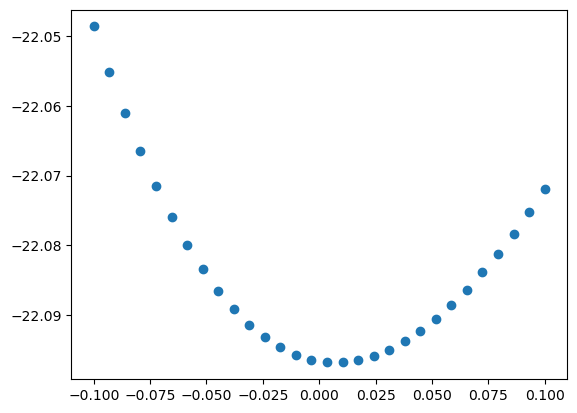

 34%|███▎      | 13500/40001 [2:01:31<3:54:07,  1.89it/s]

13500 curvature tensor(1.9264, dtype=torch.float64, grad_fn=<DivBackward0>) 0.49751744437513495 distance 0.0293574344965615 loss 2.3178939670316896
trueloss 2.3178939670316896
loss 2.3178939670316896
tensor([0.0226, 0.0120, 0.0047, 0.0146, 0.0051, 0.0145, 0.0091, 0.0224, 0.0194,
        0.0058], dtype=torch.float64, grad_fn=<SubBackward0>)


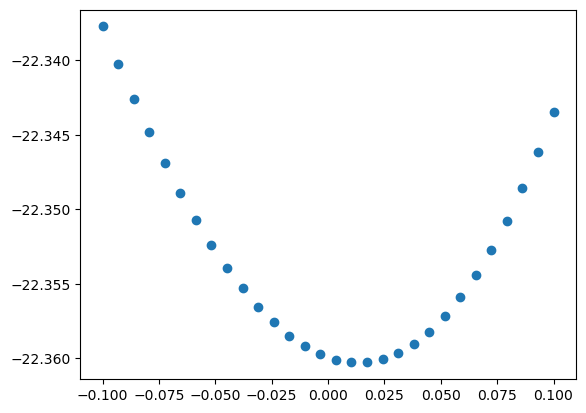

 35%|███▍      | 14000/40001 [2:06:00<3:52:37,  1.86it/s]

14000 curvature tensor(3.3512, dtype=torch.float64, grad_fn=<DivBackward0>) 0.10413421179162094 distance 0.018912501405458425 loss 1.181130124312422
trueloss 1.181130124312422
loss 1.181130124312422
tensor([0.0242, 0.0134, 0.0150, 0.0122, 0.0229, 0.0299, 0.0234, 0.0187, 0.0094,
        0.0080], dtype=torch.float64, grad_fn=<SubBackward0>)


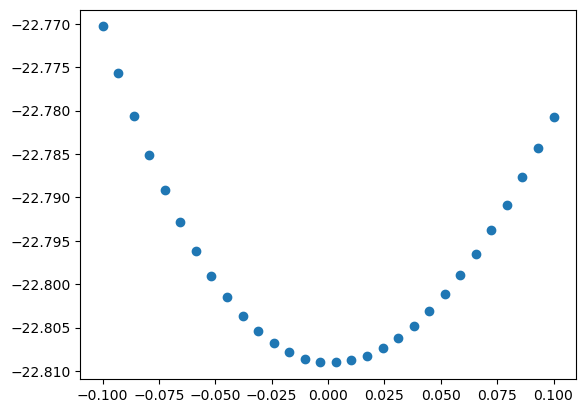

 36%|███▌      | 14500/40001 [2:10:30<3:51:02,  1.84it/s]

14500 curvature tensor(3.7292, dtype=torch.float64, grad_fn=<DivBackward0>) 0.06583410448856801 distance 0.0018437372754881538 loss 1.5738264096387204
trueloss 1.5738264096387204
loss 1.5738264096387204
tensor([0.0187, 0.0303, 0.0208, 0.0370, 0.0484, 0.0549, 0.0191, 0.0449, 0.0596,
        0.0658], dtype=torch.float64, grad_fn=<SubBackward0>)


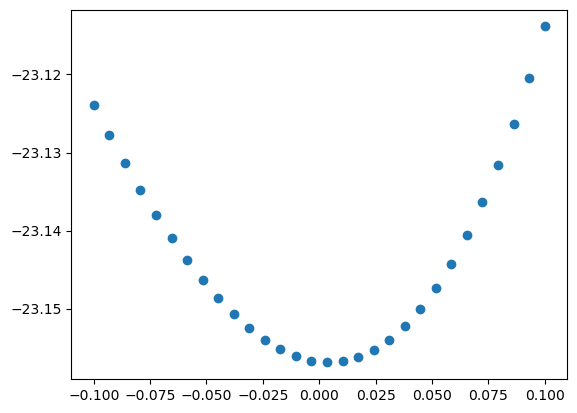

 37%|███▋      | 15000/40001 [2:15:01<3:46:28,  1.84it/s]

15000 curvature tensor(4.0774, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0886065698407988 distance 0.014607304940160002 loss 1.438951412338686
trueloss 1.438951412338686
loss 1.438951412338686
tensor([0.0444, 0.0267, 0.0447, 0.0142, 0.0514, 0.0544, 0.0379, 0.0403, 0.0230,
        0.0145], dtype=torch.float64, grad_fn=<SubBackward0>)


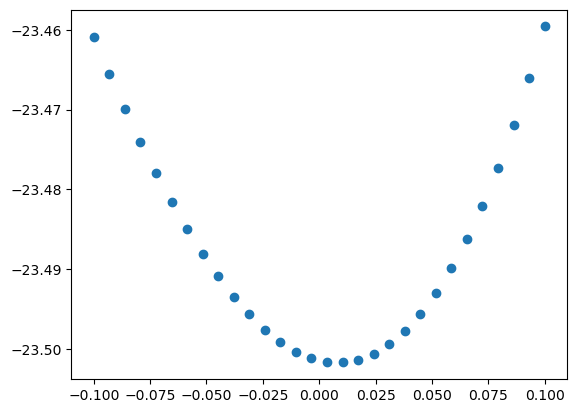

 39%|███▊      | 15500/40001 [2:19:31<3:40:57,  1.85it/s]

15500 curvature tensor(4.6869, dtype=torch.float64, grad_fn=<DivBackward0>) 0.04550611018159376 distance 0.010620477173065657 loss 1.2257478249502423
trueloss 1.2257478249502423
loss 1.2257478249502423
tensor([0.0297, 0.0566, 0.0355, 0.0256, 0.0351, 0.0319, 0.0226, 0.0173, 0.0233,
        0.0381], dtype=torch.float64, grad_fn=<SubBackward0>)


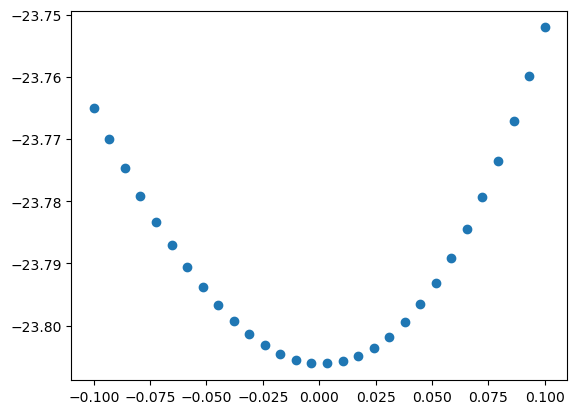

 40%|███▉      | 16000/40001 [2:24:02<3:34:06,  1.87it/s]

16000 curvature tensor(4.5449, dtype=torch.float64, grad_fn=<DivBackward0>) 0.03493995167123585 distance 0.007635358688066365 loss 0.8110178728278146
trueloss 0.8110178728278146
loss 0.8110178728278146
tensor([0.0334, 0.0258, 0.0417, 0.0128, 0.0385, 0.0497, 0.0205, 0.0403, 0.0257,
        0.0480], dtype=torch.float64, grad_fn=<SubBackward0>)


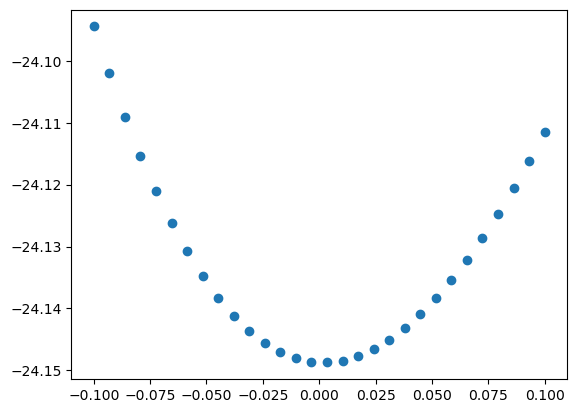

 41%|████      | 16500/40001 [2:28:33<3:29:30,  1.87it/s]

16500 curvature tensor(4.6825, dtype=torch.float64, grad_fn=<DivBackward0>) 0.046953559951506206 distance 0.008162447175080589 loss 0.46636719593752873
trueloss 0.46636719593752873
loss 0.46636719593752873
tensor([0.0383, 0.0449, 0.0216, 0.0192, 0.0382, 0.0402, 0.0220, 0.0214, 0.0452,
        0.0252], dtype=torch.float64, grad_fn=<SubBackward0>)


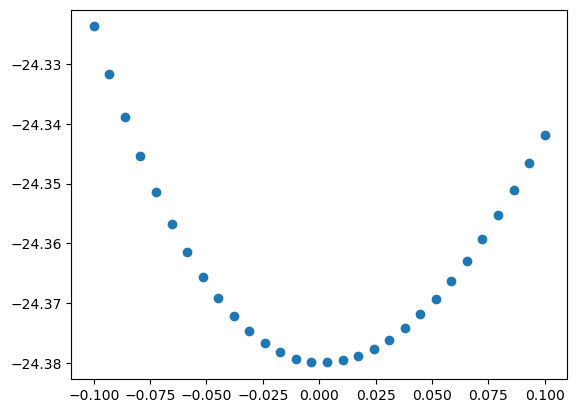

 42%|████▏     | 17000/40001 [2:33:02<3:22:21,  1.89it/s]

17000 curvature tensor(4.9788, dtype=torch.float64, grad_fn=<DivBackward0>) 0.008775113692822087 distance 0.0066843797822819274 loss 0.5863334720643527
trueloss 0.5863334720643527
loss 0.5863334720643527
tensor([0.0486, 0.0213, 0.0536, 0.0597, 0.0204, 0.0179, 0.0199, 0.0541, 0.0326,
        0.0309], dtype=torch.float64, grad_fn=<SubBackward0>)


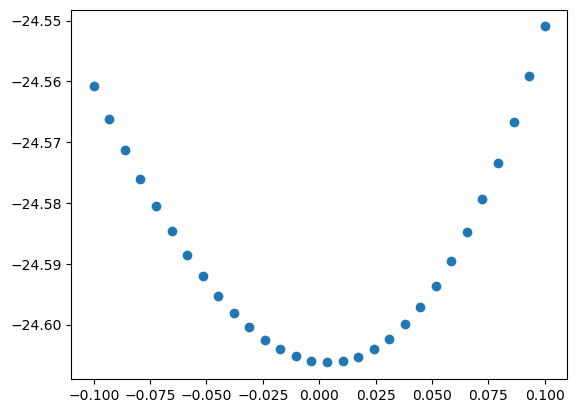

 44%|████▎     | 17500/40001 [2:37:31<3:19:16,  1.88it/s]

17500 curvature tensor(4.7837, dtype=torch.float64, grad_fn=<DivBackward0>) 0.027435460484686144 distance 0.007392011290633127 loss 0.37029930757888535
trueloss 0.37029930757888535
loss 0.37029930757888535
tensor([0.0204, 0.0735, 0.0396, 0.0647, 0.0411, 0.0340, 0.0726, 0.0687, 0.0282,
        0.0490], dtype=torch.float64, grad_fn=<SubBackward0>)


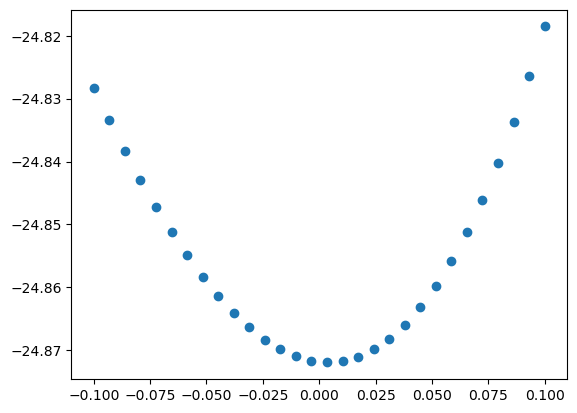

 45%|████▍     | 18000/40001 [2:42:00<3:12:56,  1.90it/s]

18000 curvature tensor(5.0261, dtype=torch.float64, grad_fn=<DivBackward0>) 0.028134452120248496 distance 0.007952116900893267 loss 0.9975943814890249
trueloss 0.9975943814890249
loss 0.9975943814890249
tensor([0.0604, 0.0822, 0.0449, 0.0358, 0.0248, 0.0239, 0.0473, 0.0400, 0.0362,
        0.0220], dtype=torch.float64, grad_fn=<SubBackward0>)


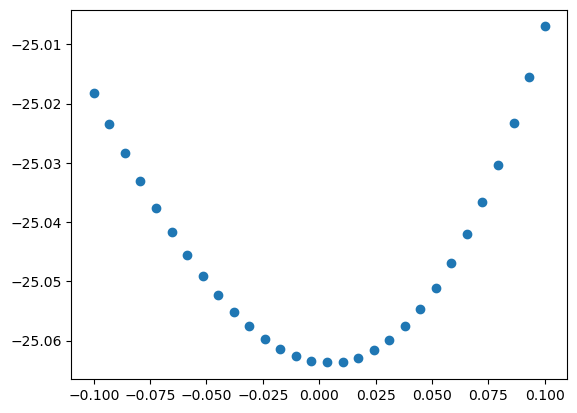

 46%|████▌     | 18500/40001 [2:46:28<3:13:11,  1.85it/s]

18500 curvature tensor(3.1291, dtype=torch.float64, grad_fn=<DivBackward0>) 0.1202161358507048 distance 0.011650920264822779 loss 0.9723608121971263
trueloss 0.9723608121971263
loss 0.9723608121971263
tensor([0.0334, 0.0163, 0.0372, 0.0388, 0.0128, 0.0115, 0.0130, 0.0162, 0.0130,
        0.0398], dtype=torch.float64, grad_fn=<SubBackward0>)


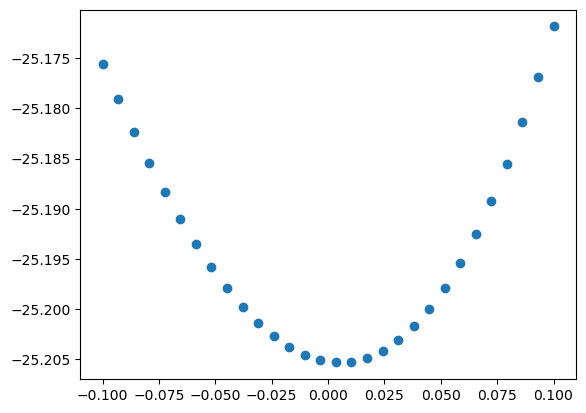

 47%|████▋     | 19000/40001 [2:50:59<3:07:44,  1.86it/s]

19000 curvature tensor(4.9729, dtype=torch.float64, grad_fn=<DivBackward0>) 0.049893172379381866 distance 0.005863472196466248 loss 0.24813256957226518
trueloss 0.24813256957226518
loss 0.24813256957226518
tensor([0.0359, 0.0437, 0.0516, 0.0336, 0.0157, 0.0354, 0.0523, 0.0164, 0.0284,
        0.0414], dtype=torch.float64, grad_fn=<SubBackward0>)


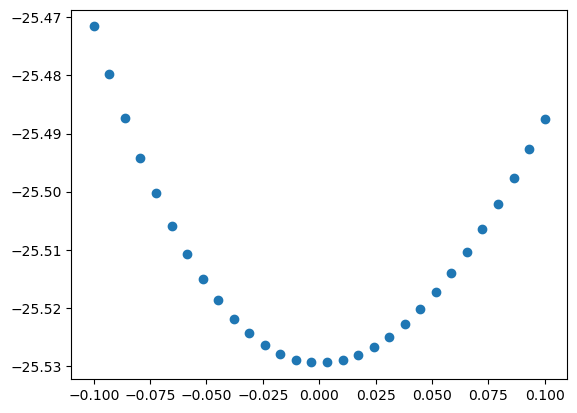

 49%|████▊     | 19500/40001 [2:55:32<3:07:18,  1.82it/s]

19500 curvature tensor(4.3579, dtype=torch.float64, grad_fn=<DivBackward0>) 0.31326095636612794 distance 0.026800936608638703 loss 0.5745193584039698
trueloss 0.5745193584039698
loss 0.5745193584039698
tensor([0.0267, 0.0174, 0.0269, 0.0566, 0.0247, 0.0234, 0.0249, 0.0578, 0.0266,
        0.0161], dtype=torch.float64, grad_fn=<SubBackward0>)


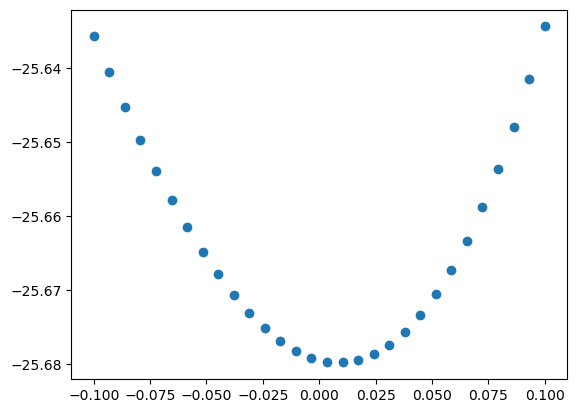

 50%|████▉     | 20000/40001 [3:00:04<3:05:50,  1.79it/s]

20000 curvature tensor(4.9111, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0032603553362557033 distance 0.003357803814424642 loss 0.5070546916992957
trueloss 0.5070546916992957
loss 0.5070546916992957
tensor([0.0434, 0.0416, 0.0828, 0.0248, 0.0576, 0.0874, 0.0212, 0.0391, 0.0596,
        0.0606], dtype=torch.float64, grad_fn=<SubBackward0>)


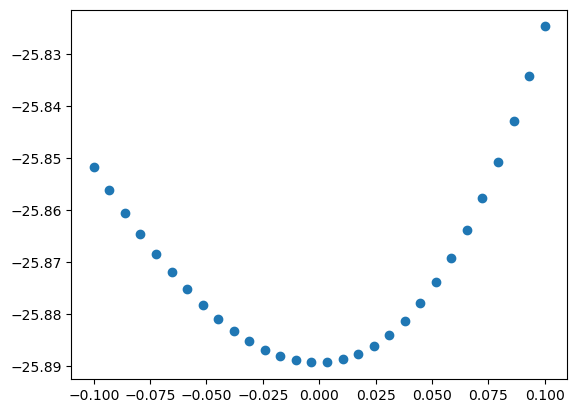

 51%|█████     | 20500/40001 [3:04:34<2:54:51,  1.86it/s]

20500 curvature tensor(5.8544, dtype=torch.float64, grad_fn=<DivBackward0>) 0.02622099938311804 distance 0.0044736981422454905 loss 0.38888515450066824
trueloss 0.38888515450066824
loss 0.38888515450066824
tensor([0.0588, 0.0344, 0.0517, 0.0413, 0.0479, 0.0340, 0.0334, 0.0205, 0.0361,
        0.0404], dtype=torch.float64, grad_fn=<SubBackward0>)


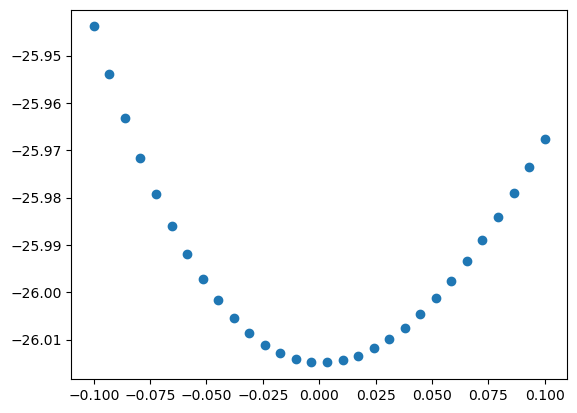

 52%|█████▏    | 21000/40001 [3:09:04<2:46:57,  1.90it/s]

21000 curvature tensor(3.6891, dtype=torch.float64, grad_fn=<DivBackward0>) 0.038018635156483155 distance 0.0038949865435631984 loss 0.2087150445215304
trueloss 0.2087150445215304
loss 0.2087150445215304
tensor([0.0343, 0.0147, 0.0257, 0.0387, 0.0454, 0.0182, 0.0416, 0.0249, 0.0133,
        0.0500], dtype=torch.float64, grad_fn=<SubBackward0>)


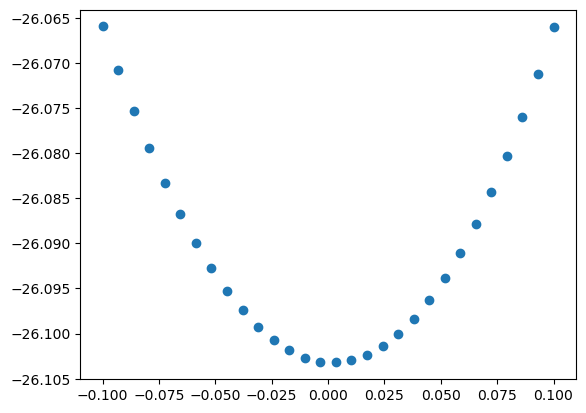

 54%|█████▎    | 21500/40001 [3:13:35<2:47:54,  1.84it/s]

21500 curvature tensor(6.0027, dtype=torch.float64, grad_fn=<DivBackward0>) 0.015731559443105315 distance 0.0038279330805283613 loss 0.34686595289721
trueloss 0.34686595289721
loss 0.34686595289721
tensor([0.0451, 0.0181, 0.0313, 0.0350, 0.0630, 0.0441, 0.0392, 0.0312, 0.0586,
        0.0346], dtype=torch.float64, grad_fn=<SubBackward0>)


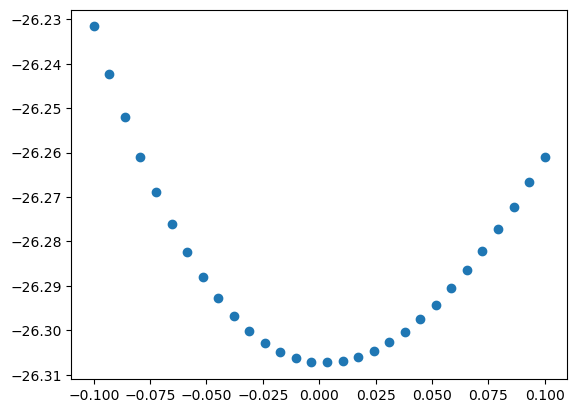

 55%|█████▍    | 22000/40001 [3:18:04<2:40:54,  1.86it/s]

22000 curvature tensor(5.4337, dtype=torch.float64, grad_fn=<DivBackward0>) 0.018933186174012157 distance 0.003844589594667328 loss 0.23712646810908727
trueloss 0.23712646810908727
loss 0.23712646810908727
tensor([0.0266, 0.0166, 0.0404, 0.0498, 0.0394, 0.0170, 0.0244, 0.0242, 0.0192,
        0.0546], dtype=torch.float64, grad_fn=<SubBackward0>)


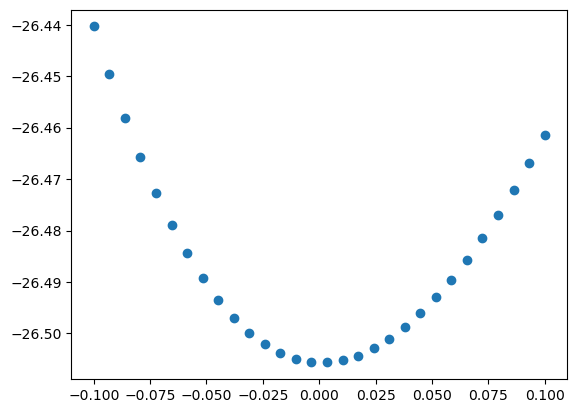

 56%|█████▌    | 22500/40001 [3:22:34<2:34:39,  1.89it/s]

22500 curvature tensor(4.9381, dtype=torch.float64, grad_fn=<DivBackward0>) 0.1525567202785008 distance 0.01726078692373013 loss 0.3301550270801602
trueloss 0.3301550270801602
loss 0.3301550270801602
tensor([0.0671, 0.0711, 0.0203, 0.0489, 0.0155, 0.0341, 0.0496, 0.0615, 0.0602,
        0.0267], dtype=torch.float64, grad_fn=<SubBackward0>)


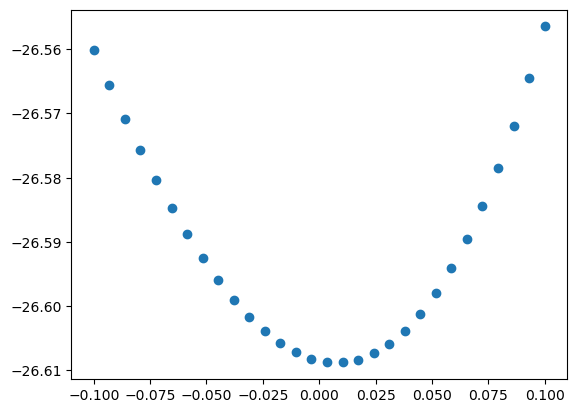

 57%|█████▋    | 23000/40001 [3:27:06<2:34:34,  1.83it/s]

23000 curvature tensor(4.1026, dtype=torch.float64, grad_fn=<DivBackward0>) 0.015325314365790963 distance 0.003176315645894407 loss 0.2863590759094925
trueloss 0.2863590759094925
loss 0.2863590759094925
tensor([0.0508, 0.0333, 0.0346, 0.0258, 0.0289, 0.0289, 0.0264, 0.0416, 0.0559,
        0.0530], dtype=torch.float64, grad_fn=<SubBackward0>)


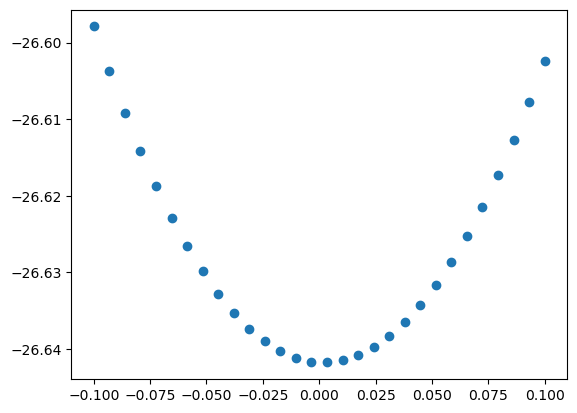

 59%|█████▊    | 23500/40001 [3:31:35<2:27:05,  1.87it/s]

23500 curvature tensor(6.2280, dtype=torch.float64, grad_fn=<DivBackward0>) 0.007186503148799563 distance 0.004448244875839799 loss 0.059462496767625744
trueloss 0.059462496767625744
loss 0.059462496767625744
tensor([0.0793, 0.0381, 0.0288, 0.0555, 0.0376, 0.0311, 0.0329, 0.0563, 0.1015,
        0.0254], dtype=torch.float64, grad_fn=<SubBackward0>)


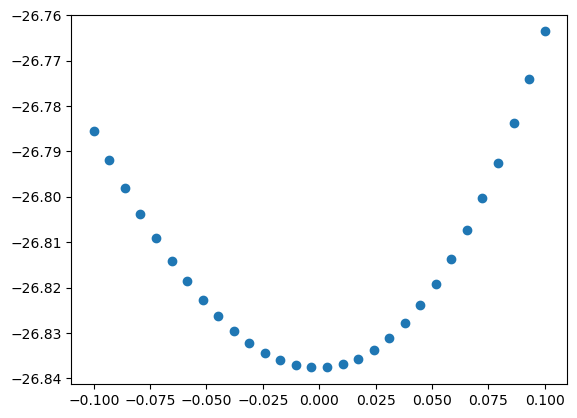

 60%|█████▉    | 24000/40001 [3:36:04<2:24:50,  1.84it/s]

24000 curvature tensor(6.8315, dtype=torch.float64, grad_fn=<DivBackward0>) 0.02097576928822286 distance 0.005169649939922383 loss 0.3247574488363195
trueloss 0.3247574488363195
loss 0.3247574488363195
tensor([0.0466, 0.0734, 0.0425, 0.0463, 0.0747, 0.0349, 0.0551, 0.0359, 0.0570,
        0.0426], dtype=torch.float64, grad_fn=<SubBackward0>)


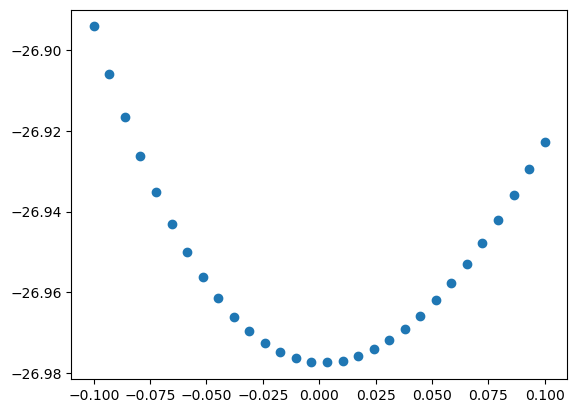

 61%|██████    | 24500/40001 [3:40:34<2:18:21,  1.87it/s]

24500 curvature tensor(5.7843, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0035994989257167563 distance 0.003470663880973151 loss 0.21377252587440285
trueloss 0.21377252587440285
loss 0.21377252587440285
tensor([0.1094, 0.0490, 0.0329, 0.0866, 0.0473, 0.0975, 0.0262, 0.0649, 0.0919,
        0.0515], dtype=torch.float64, grad_fn=<SubBackward0>)


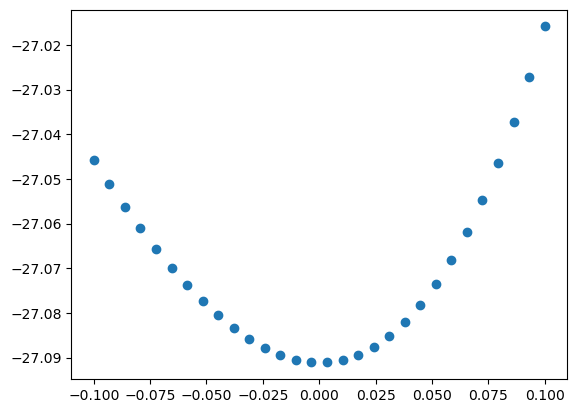

 62%|██████▏   | 25000/40001 [3:45:03<2:12:22,  1.89it/s]

25000 curvature tensor(4.3015, dtype=torch.float64, grad_fn=<DivBackward0>) 0.007432796853988037 distance 0.0024427265739568015 loss 0.4926065781309816
trueloss 0.4926065781309816
loss 0.4926065781309816
tensor([0.0234, 0.0601, 0.0498, 0.0339, 0.0658, 0.0421, 0.0158, 0.0572, 0.0632,
        0.0256], dtype=torch.float64, grad_fn=<SubBackward0>)


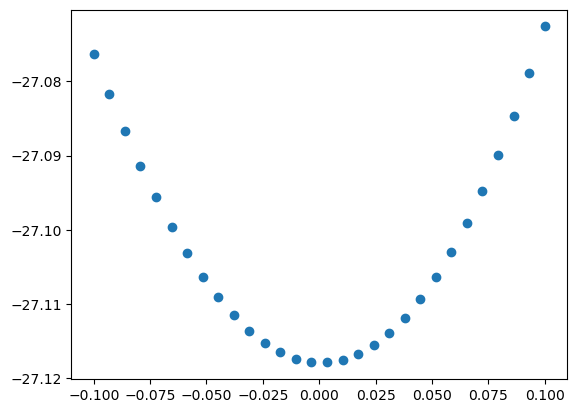

 64%|██████▎   | 25500/40001 [3:49:34<2:11:11,  1.84it/s]

25500 curvature tensor(6.2907, dtype=torch.float64, grad_fn=<DivBackward0>) 0.014515398377143865 distance 0.004991058962730351 loss 0.14022196718395152
trueloss 0.14022196718395152
loss 0.14022196718395152
tensor([0.0248, 0.0246, 0.0847, 0.0527, 0.0971, 0.0385, 0.0486, 0.0899, 0.0352,
        0.0407], dtype=torch.float64, grad_fn=<SubBackward0>)


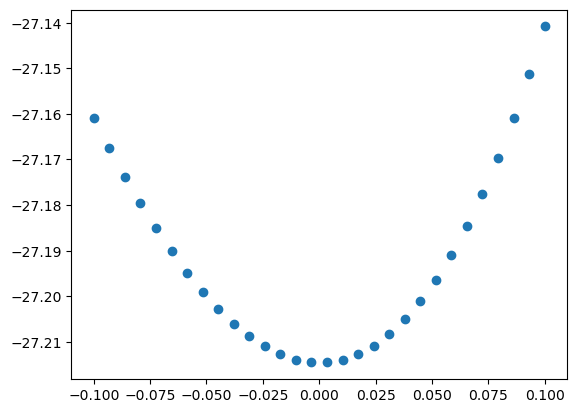

 65%|██████▍   | 26000/40001 [3:54:05<2:04:57,  1.87it/s]

26000 curvature tensor(4.7955, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0030125828436853375 distance 0.0030585396968332164 loss 0.09965465882671602
trueloss 0.09965465882671602
loss 0.09965465882671602
tensor([0.0783, 0.0662, 0.0541, 0.0386, 0.0242, 0.0380, 0.0585, 0.0458, 0.0489,
        0.0640], dtype=torch.float64, grad_fn=<SubBackward0>)


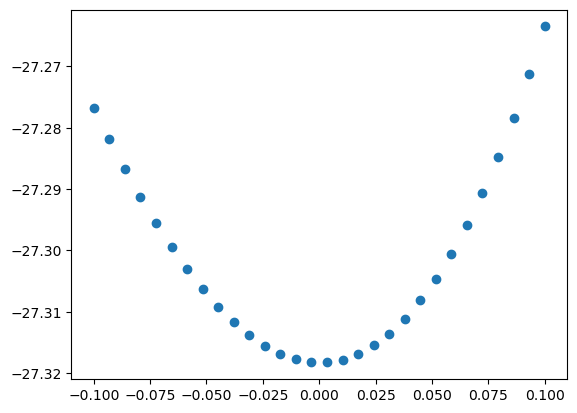

 66%|██████▌   | 26500/40001 [3:58:38<2:00:03,  1.87it/s]

26500 curvature tensor(8.6073, dtype=torch.float64, grad_fn=<DivBackward0>) 0.004232103562959279 distance 0.003835376457733697 loss 0.08479176674177326
trueloss 0.08479176674177326
loss 0.08479176674177326
tensor([0.1280, 0.0923, 0.1235, 0.0749, 0.1211, 0.1102, 0.0699, 0.0921, 0.0690,
        0.0338], dtype=torch.float64, grad_fn=<SubBackward0>)


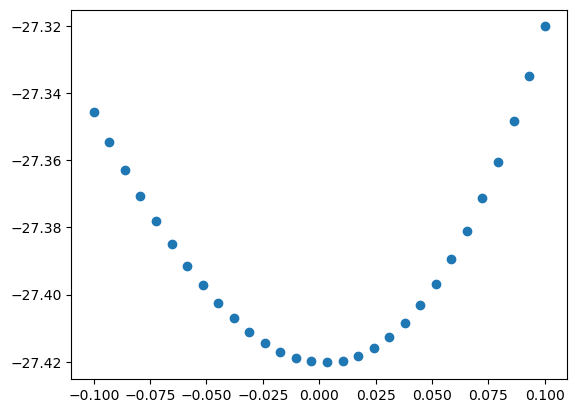

 67%|██████▋   | 27000/40001 [4:03:10<1:57:33,  1.84it/s]

27000 curvature tensor(10.1631, dtype=torch.float64, grad_fn=<DivBackward0>) 0.03411817019616352 distance 0.007464869888835736 loss 0.43635447477797007
trueloss 0.43635447477797007
loss 0.43635447477797007
tensor([0.0962, 0.0832, 0.1424, 0.1129, 0.1384, 0.0817, 0.0419, 0.0801, 0.0804,
        0.0602], dtype=torch.float64, grad_fn=<SubBackward0>)


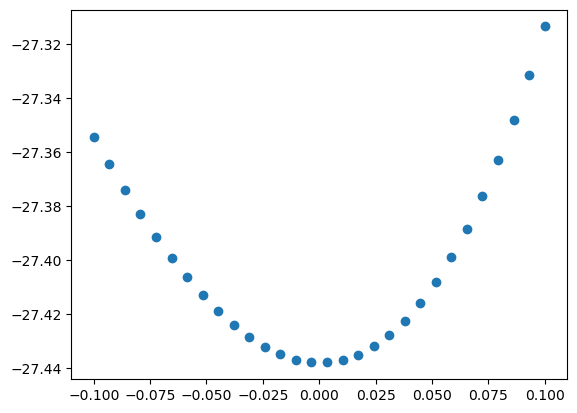

 69%|██████▊   | 27500/40001 [4:07:41<1:51:29,  1.87it/s]

27500 curvature tensor(4.1437, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0723037214518867 distance 0.012351824726961426 loss 0.2313162442564703
trueloss 0.2313162442564703
loss 0.2313162442564703
tensor([0.0320, 0.0132, 0.0578, 0.0323, 0.0187, 0.0559, 0.0419, 0.0313, 0.0483,
        0.0521], dtype=torch.float64, grad_fn=<SubBackward0>)


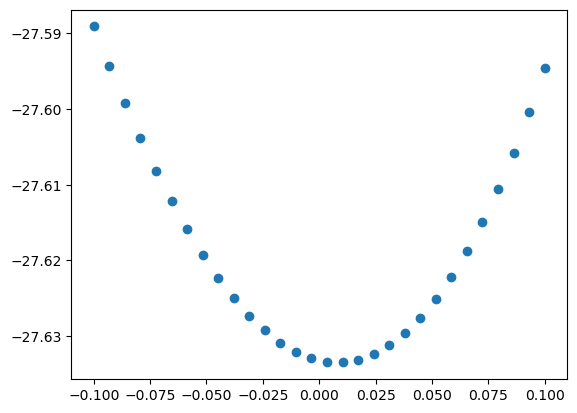

 70%|██████▉   | 28000/40001 [4:12:12<1:45:56,  1.89it/s]

28000 curvature tensor(7.3521, dtype=torch.float64, grad_fn=<DivBackward0>) 0.010687614635641607 distance 0.003219467798145778 loss 0.19776963030725606
trueloss 0.19776963030725606
loss 0.19776963030725606
tensor([0.0578, 0.0528, 0.0525, 0.0238, 0.0465, 0.0265, 0.0286, 0.0713, 0.0256,
        0.0285], dtype=torch.float64, grad_fn=<SubBackward0>)


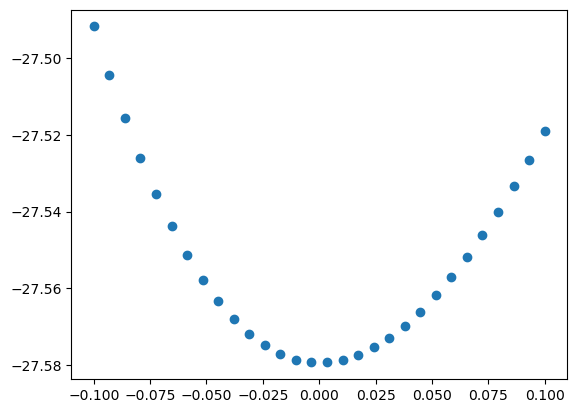

 71%|███████   | 28500/40001 [4:16:43<1:44:15,  1.84it/s]

28500 curvature tensor(10.2996, dtype=torch.float64, grad_fn=<DivBackward0>) 0.009422726147488935 distance 0.0034121679639682813 loss 0.1777930036995725
trueloss 0.1777930036995725
loss 0.1777930036995725
tensor([0.1048, 0.0470, 0.1030, 0.0507, 0.0493, 0.0899, 0.0976, 0.0513, 0.0523,
        0.0608], dtype=torch.float64, grad_fn=<SubBackward0>)


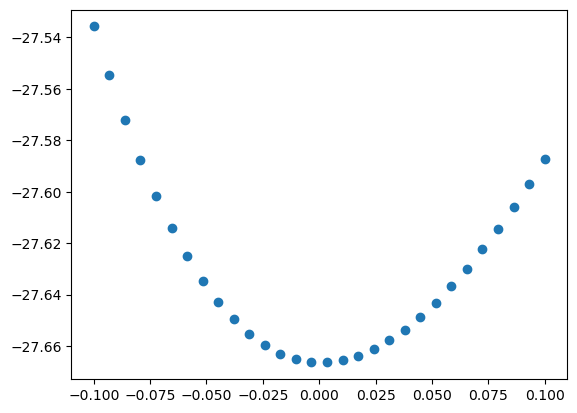

 72%|███████▏  | 29000/40001 [4:21:14<1:38:31,  1.86it/s]

29000 curvature tensor(7.1167, dtype=torch.float64, grad_fn=<DivBackward0>) 0.018948528406381487 distance 0.005655332619985651 loss 0.09272725726904821
trueloss 0.09272725726904821
loss 0.09272725726904821
tensor([0.0957, 0.0326, 0.0632, 0.0377, 0.1114, 0.0298, 0.0686, 0.0555, 0.0348,
        0.1064], dtype=torch.float64, grad_fn=<SubBackward0>)


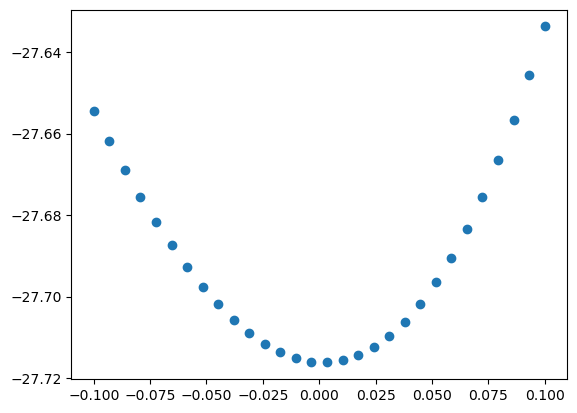

 74%|███████▎  | 29500/40001 [4:25:44<1:33:38,  1.87it/s]

29500 curvature tensor(7.2092, dtype=torch.float64, grad_fn=<DivBackward0>) 0.00455568773166671 distance 0.003959732136621892 loss 0.07885033303870083
trueloss 0.07885033303870083
loss 0.07885033303870083
tensor([0.0711, 0.0350, 0.0617, 0.0721, 0.1200, 0.0887, 0.0392, 0.0699, 0.0656,
        0.0787], dtype=torch.float64, grad_fn=<SubBackward0>)


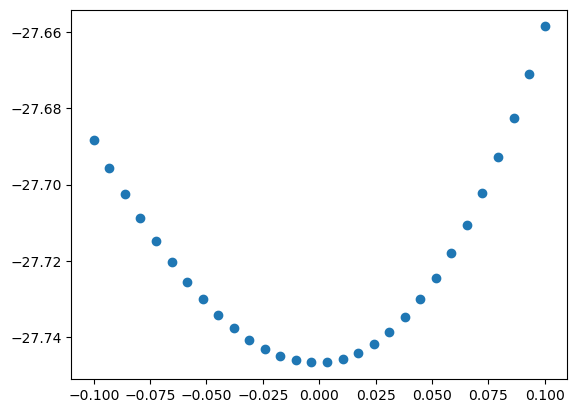

 75%|███████▍  | 30000/40001 [4:30:15<1:30:59,  1.83it/s]

30000 curvature tensor(10.5778, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0007463182555487896 distance 0.0033113645002685326 loss 0.09229721764440948
trueloss 0.09229721764440948
loss 0.09229721764440948
tensor([0.1091, 0.0430, 0.0667, 0.1318, 0.1836, 0.1136, 0.0902, 0.0726, 0.1302,
        0.1213], dtype=torch.float64, grad_fn=<SubBackward0>)


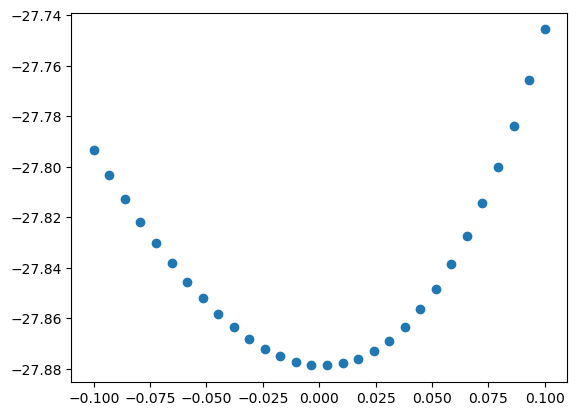

 76%|███████▌  | 30500/40001 [4:34:45<1:25:21,  1.86it/s]

30500 curvature tensor(10.3103, dtype=torch.float64, grad_fn=<DivBackward0>) 0.015026033553066122 distance 0.003407235217481185 loss 0.1583345063741641
trueloss 0.1583345063741641
loss 0.1583345063741641
tensor([0.1109, 0.0953, 0.0563, 0.0607, 0.0859, 0.0352, 0.0945, 0.1083, 0.0739,
        0.0522], dtype=torch.float64, grad_fn=<SubBackward0>)


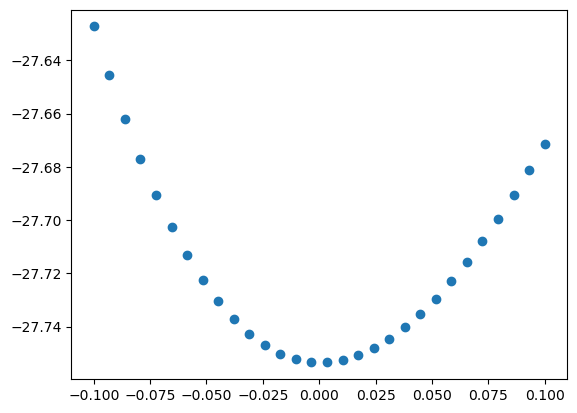

 77%|███████▋  | 31000/40001 [4:39:15<1:20:19,  1.87it/s]

31000 curvature tensor(9.2301, dtype=torch.float64, grad_fn=<DivBackward0>) 0.009483481131865182 distance 0.004980981392374526 loss 0.044371846993335275
trueloss 0.044371846993335275
loss 0.044371846993335275
tensor([0.1526, 0.1140, 0.1267, 0.1165, 0.0923, 0.0633, 0.1402, 0.0788, 0.1044,
        0.0394], dtype=torch.float64, grad_fn=<SubBackward0>)


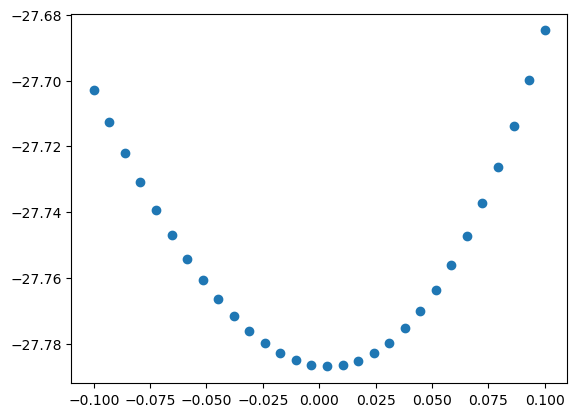

 79%|███████▊  | 31500/40001 [4:43:45<1:14:44,  1.90it/s]

31500 curvature tensor(12.9030, dtype=torch.float64, grad_fn=<DivBackward0>) 0.01020905015308606 distance 0.003390332659721946 loss 0.2583739430737319
trueloss 0.2583739430737319
loss 0.2583739430737319
tensor([0.0514, 0.1182, 0.0570, 0.1369, 0.0573, 0.0985, 0.0700, 0.1309, 0.0385,
        0.1349], dtype=torch.float64, grad_fn=<SubBackward0>)


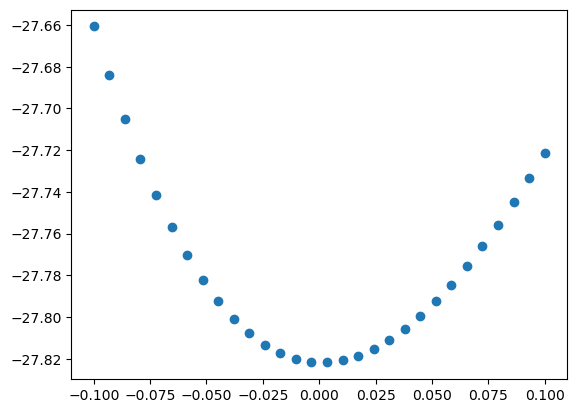

 80%|███████▉  | 32000/40001 [4:48:16<1:12:43,  1.83it/s]

32000 curvature tensor(9.7861, dtype=torch.float64, grad_fn=<DivBackward0>) 0.016337266161468366 distance 0.0023867716997579575 loss 0.14023796957887819
trueloss 0.14023796957887819
loss 0.14023796957887819
tensor([0.0372, 0.0863, 0.0419, 0.0672, 0.0696, 0.0457, 0.0514, 0.0964, 0.0441,
        0.0314], dtype=torch.float64, grad_fn=<SubBackward0>)


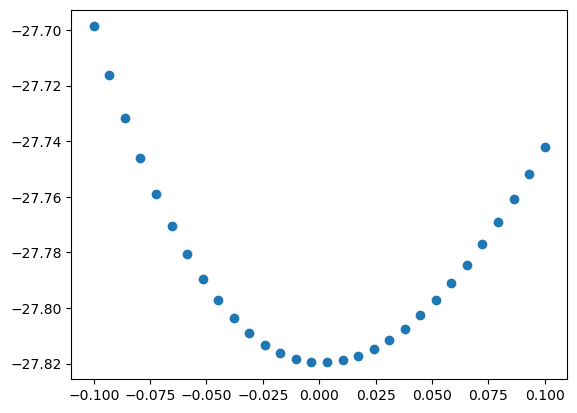

 81%|████████  | 32500/40001 [4:52:51<1:08:38,  1.82it/s]

32500 curvature tensor(10.4834, dtype=torch.float64, grad_fn=<DivBackward0>) 0.03335089975875399 distance 0.008708453509016995 loss 0.1927270130812112
trueloss 0.1927270130812112
loss 0.1927270130812112
tensor([0.1296, 0.0589, 0.1695, 0.0515, 0.0741, 0.0367, 0.1564, 0.1441, 0.0460,
        0.0763], dtype=torch.float64, grad_fn=<SubBackward0>)


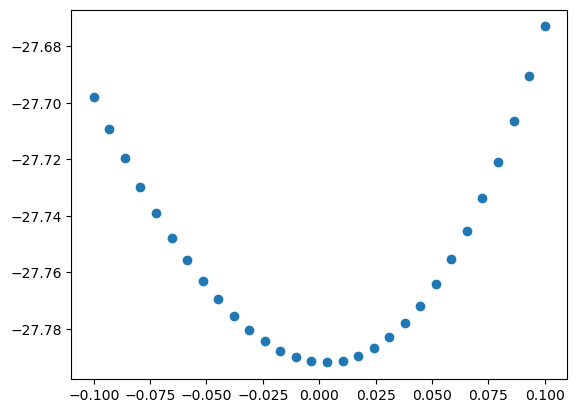

 82%|████████▏ | 33000/40001 [4:57:23<1:06:39,  1.75it/s]

33000 curvature tensor(4.6394, dtype=torch.float64, grad_fn=<DivBackward0>) 0.04400677245238679 distance 0.00887929702940866 loss 0.17153343362802514
trueloss 0.17153343362802514
loss 0.17153343362802514
tensor([0.0598, 0.0283, 0.0143, 0.0161, 0.0586, 0.0558, 0.0230, 0.0518, 0.0229,
        0.0600], dtype=torch.float64, grad_fn=<SubBackward0>)


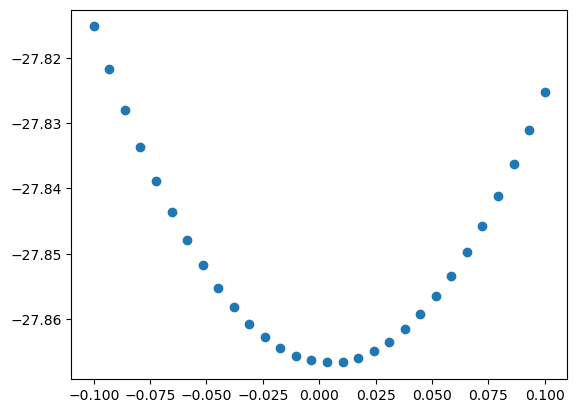

 84%|████████▎ | 33500/40001 [5:01:54<1:00:01,  1.81it/s]

33500 curvature tensor(10.6268, dtype=torch.float64, grad_fn=<DivBackward0>) 0.012908372754523001 distance 0.002572595765914497 loss 0.11838799722760776
trueloss 0.11838799722760776
loss 0.11838799722760776
tensor([0.0572, 0.0738, 0.0695, 0.0613, 0.0711, 0.0709, 0.0458, 0.0817, 0.0760,
        0.1061], dtype=torch.float64, grad_fn=<SubBackward0>)


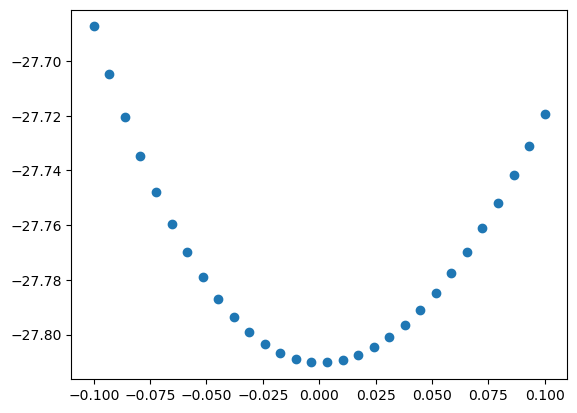

 85%|████████▍ | 34000/40001 [5:06:25<55:31,  1.80it/s]  

34000 curvature tensor(8.0970, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0014467599793976688 distance 0.003872435216766915 loss 0.027663245046382092
trueloss 0.027663245046382092
loss 0.027663245046382092
tensor([0.0970, 0.0894, 0.0521, 0.0950, 0.0935, 0.1082, 0.0354, 0.0889, 0.1348,
        0.1242], dtype=torch.float64, grad_fn=<SubBackward0>)


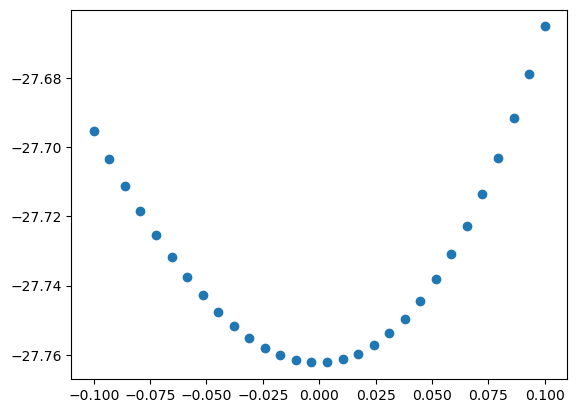

 86%|████████▌ | 34500/40001 [5:10:55<49:32,  1.85it/s]  

34500 curvature tensor(6.2517, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0030531634738787954 distance 0.0032493322904853785 loss 0.08059387410412512
trueloss 0.08059387410412512
loss 0.08059387410412512
tensor([0.0700, 0.0438, 0.0848, 0.0832, 0.0885, 0.0336, 0.0891, 0.0348, 0.0580,
        0.0519], dtype=torch.float64, grad_fn=<SubBackward0>)


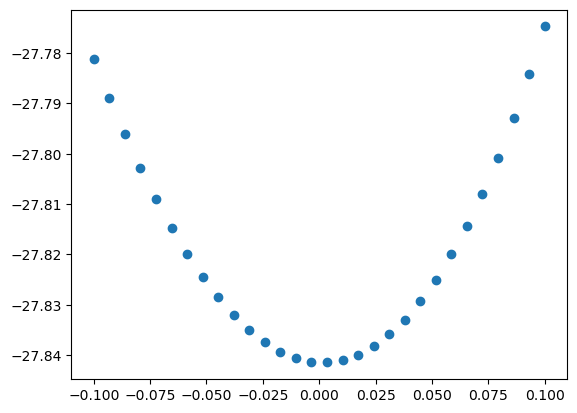

 87%|████████▋ | 35000/40001 [5:15:26<46:20,  1.80it/s]

35000 curvature tensor(10.5338, dtype=torch.float64, grad_fn=<DivBackward0>) 0.028326132981702085 distance 0.0024215586627885518 loss 0.13611164876696868
trueloss 0.13611164876696868
loss 0.13611164876696868
tensor([0.0664, 0.1054, 0.0829, 0.0590, 0.1041, 0.0503, 0.0863, 0.0529, 0.1002,
        0.0743], dtype=torch.float64, grad_fn=<SubBackward0>)


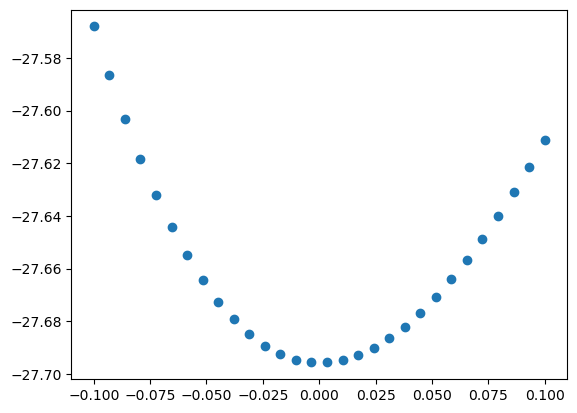

 89%|████████▊ | 35500/40001 [5:19:56<40:51,  1.84it/s]

35500 curvature tensor(10.7110, dtype=torch.float64, grad_fn=<DivBackward0>) 0.01080322605888515 distance 0.005681048069937733 loss 0.03996967402412069
trueloss 0.03996967402412069
loss 0.03996967402412069
tensor([0.1818, 0.1430, 0.1258, 0.1743, 0.0489, 0.0477, 0.0565, 0.0616, 0.0973,
        0.0471], dtype=torch.float64, grad_fn=<SubBackward0>)


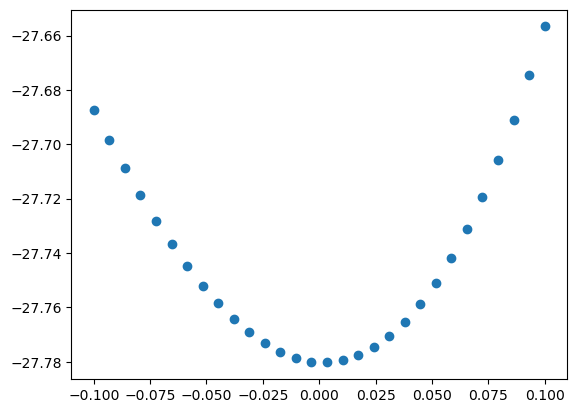

 90%|████████▉ | 36000/40001 [5:24:26<36:48,  1.81it/s]

36000 curvature tensor(11.8870, dtype=torch.float64, grad_fn=<DivBackward0>) 0.03674059134192118 distance 0.009472821831271998 loss 0.24340216028676845
trueloss 0.24340216028676845
loss 0.24340216028676845
tensor([0.0730, 0.1631, 0.1381, 0.1956, 0.1693, 0.1549, 0.0553, 0.0964, 0.0566,
        0.0502], dtype=torch.float64, grad_fn=<SubBackward0>)


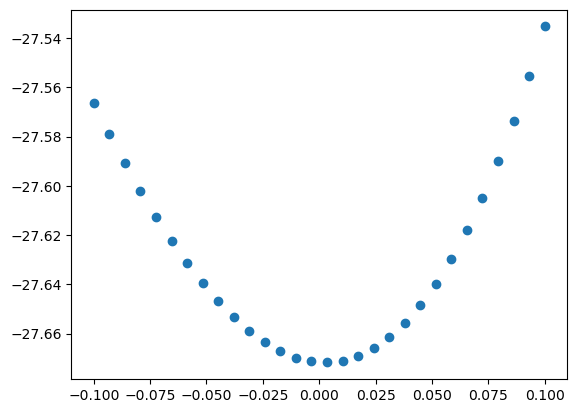

 91%|█████████ | 36500/40001 [5:28:58<31:38,  1.84it/s]

36500 curvature tensor(14.5070, dtype=torch.float64, grad_fn=<DivBackward0>) 0.021562817483092918 distance 0.003202003962812355 loss 0.1749974720838351
trueloss 0.1749974720838351
loss 0.1749974720838351
tensor([0.0608, 0.0472, 0.1401, 0.0846, 0.0480, 0.0532, 0.0445, 0.0720, 0.1059,
        0.0695], dtype=torch.float64, grad_fn=<SubBackward0>)


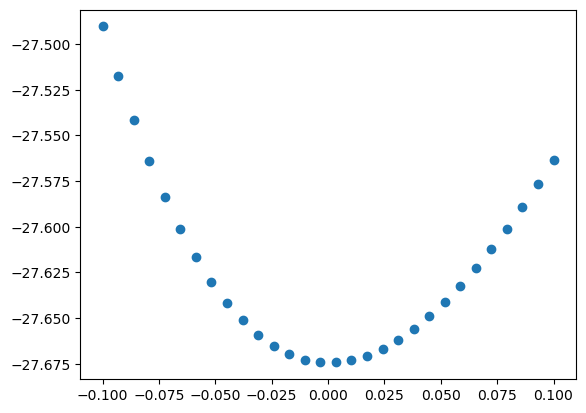

 92%|█████████▏| 37000/40001 [5:33:30<27:19,  1.83it/s]

37000 curvature tensor(11.7335, dtype=torch.float64, grad_fn=<DivBackward0>) 0.000500690415246666 distance 0.0022106963960374427 loss 0.01578875255110767
trueloss 0.01578875255110767
loss 0.01578875255110767
tensor([0.0842, 0.0750, 0.0731, 0.0628, 0.0853, 0.1264, 0.1241, 0.0752, 0.0679,
        0.1708], dtype=torch.float64, grad_fn=<SubBackward0>)


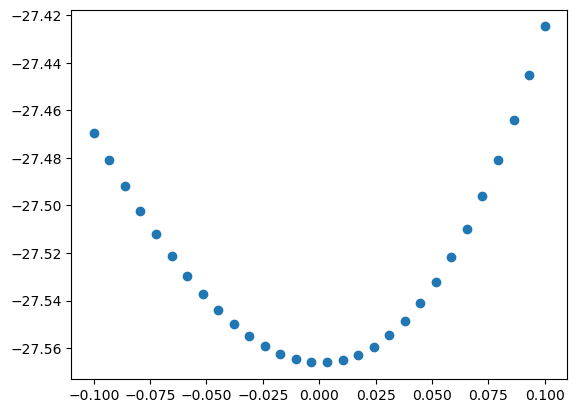

 94%|█████████▎| 37500/40001 [5:38:02<22:41,  1.84it/s]

37500 curvature tensor(13.2513, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0018720610309368195 distance 0.0025821368138792236 loss 0.031816053789877494
trueloss 0.031816053789877494
loss 0.031816053789877494
tensor([0.0662, 0.0952, 0.1954, 0.1064, 0.2280, 0.0561, 0.0575, 0.1519, 0.1485,
        0.0991], dtype=torch.float64, grad_fn=<SubBackward0>)


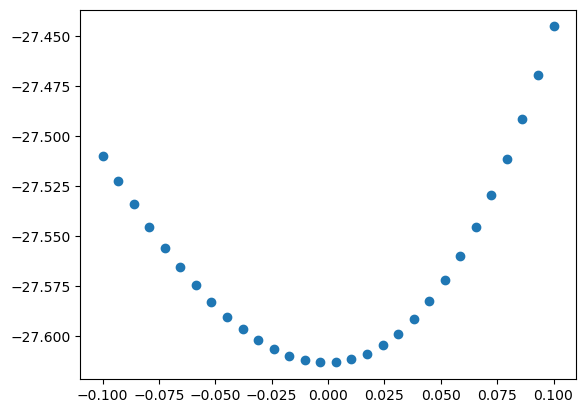

 95%|█████████▍| 38000/40001 [5:42:33<18:06,  1.84it/s]

38000 curvature tensor(4.8260, dtype=torch.float64, grad_fn=<DivBackward0>) 0.007212939621086041 distance 0.0030507674957962467 loss 0.05504831532279687
trueloss 0.05504831532279687
loss 0.05504831532279687
tensor([0.0207, 0.0196, 0.0404, 0.0565, 0.0208, 0.0571, 0.0165, 0.0566, 0.0209,
        0.0307], dtype=torch.float64, grad_fn=<SubBackward0>)


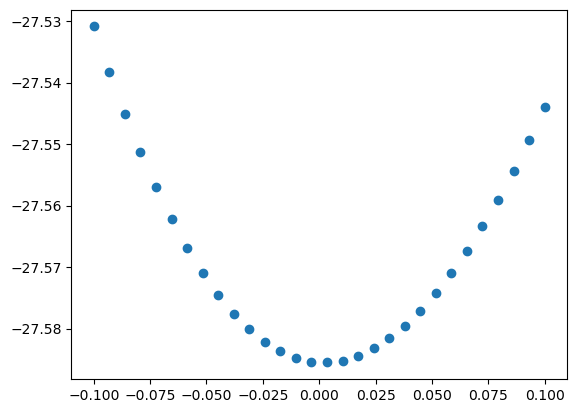

 96%|█████████▌| 38500/40001 [5:47:04<13:39,  1.83it/s]

38500 curvature tensor(9.0474, dtype=torch.float64, grad_fn=<DivBackward0>) 0.006970238422771055 distance 0.004011897972329102 loss 0.03017275372663702
trueloss 0.03017275372663702
loss 0.03017275372663702
tensor([0.1139, 0.0572, 0.0460, 0.0537, 0.1308, 0.0462, 0.0545, 0.0585, 0.1043,
        0.0671], dtype=torch.float64, grad_fn=<SubBackward0>)


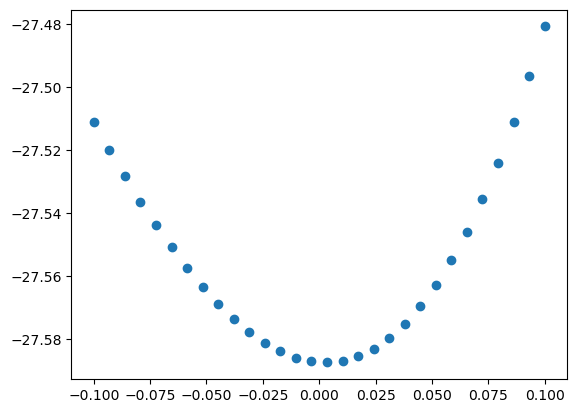

 97%|█████████▋| 39000/40001 [5:51:40<09:03,  1.84it/s]

39000 curvature tensor(15.2748, dtype=torch.float64, grad_fn=<DivBackward0>) 0.002900458817441264 distance 0.0032707678695405086 loss 0.0319453186178212
trueloss 0.0319453186178212
loss 0.0319453186178212
tensor([0.1739, 0.1662, 0.2693, 0.1017, 0.2552, 0.1598, 0.0850, 0.1377, 0.1951,
        0.0653], dtype=torch.float64, grad_fn=<SubBackward0>)


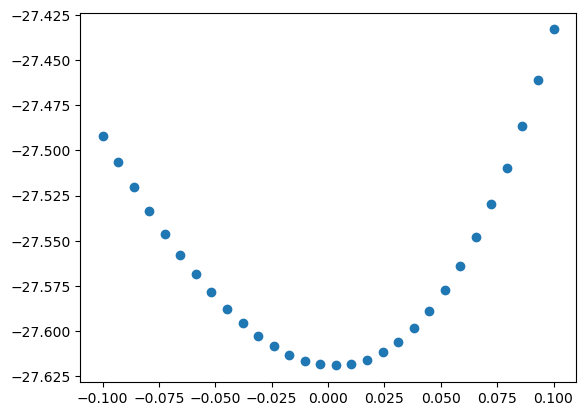

 99%|█████████▊| 39500/40001 [5:56:14<04:30,  1.85it/s]

39500 curvature tensor(5.0270, dtype=torch.float64, grad_fn=<DivBackward0>) 0.00927493789189418 distance 0.0029871235858058764 loss 0.05740556029416292
trueloss 0.05740556029416292
loss 0.05740556029416292
tensor([0.0324, 0.0269, 0.0204, 0.0504, 0.0426, 0.0486, 0.0341, 0.0602, 0.0391,
        0.0397], dtype=torch.float64, grad_fn=<SubBackward0>)


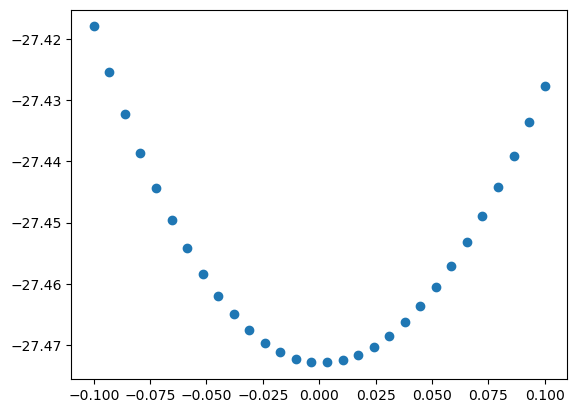

100%|█████████▉| 40000/40001 [6:00:46<00:00,  1.90it/s]

40000 curvature tensor(14.4752, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0012922176941031207 distance 0.0027479208263571403 loss 0.03271918601189562
trueloss 0.03271918601189562
loss 0.03271918601189562
tensor([0.2527, 0.0684, 0.2218, 0.0593, 0.1302, 0.1171, 0.0842, 0.0736, 0.1144,
        0.2577], dtype=torch.float64, grad_fn=<SubBackward0>)


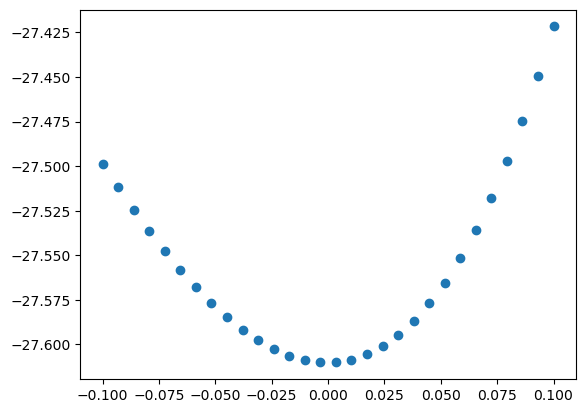

100%|██████████| 40001/40001 [6:00:46<00:00,  1.85it/s]


In [6]:
e_size=0.02

def energyAndRsquare(params, optimizer):
    ff.reset_parameters(params)
    params_0 = ff.state_dict()
    print("params_0", params_0.keys())
    for i in range(1):
        params_0=optimizer.optimize(params_0, 40001, 500, e_size, 10, 2)
    return params_0
new_params_0=energyAndRsquare(params, optimizer)


0.9860244231047833


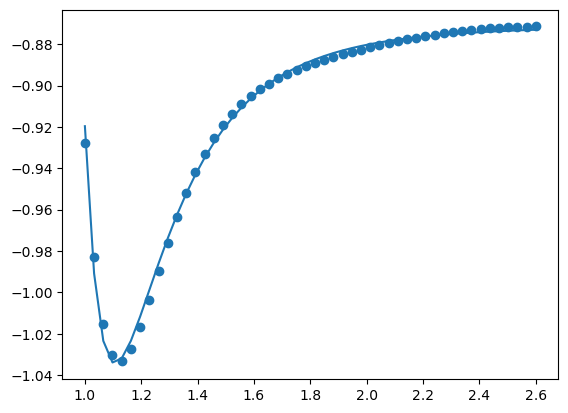

In [16]:
import matplotlib.pyplot as plt
import scipy

optimizer_Energy.ff.reset_parameters(new_params_0)
x=torch.linspace(1,2.6,50,dtype=torch.float64)
y=optimizer_Energy.ff.nets['1_1'](x)

params_temp=optimizer_spring.ff.state_dict()
#y0=(-1/(x/params_temp['r0'][1,1])**6+1/(x/params_temp['r0'][1,1])**12).detach().numpy()
y0=1/(x)**6
coeff=np.polyfit(y0,y.detach().numpy(),deg=2)
#plt.scatter(1/(x**6).detach().numpy(),y.detach().numpy())
#plt.scatter(1/(x**6).detach().numpy(),(coeff[0]*(y0**2)+coeff[1]*y0+coeff[2]).detach().numpy())
plt.scatter(x.detach().numpy(),y.detach().numpy())
#plt.scatter(x.detach().numpy(),y0*coeff[0]+coeff[1])
plt.plot(x.detach().numpy(),(coeff[0]/(x**12)+coeff[1]/(x**6)+coeff[2]).detach().numpy())
print((-coeff[0]/coeff[1])**(1/6))